In [1]:
import os
import json
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from arch import arch_model

In [2]:
ini_work_dir = os.getcwd()
os.chdir('..')

In [3]:
from local_models import calculate_retraining_garch_forecasts

In [4]:
with open('config.json') as file:
    config = json.load(file)

In [5]:
INPUT = Path(config['files_folders']['processed'])
RES_DIR = Path(config['files_folders']['research_results'])
AP_DIR = Path(config['files_folders']['antecedent_params_sets'])
LOGS_DIR = Path(config['files_folders']['logs'])
SUMMARY_TABLE_NAME = 'summary_table_seas'
FIGS_DIR = RES_DIR / 'figs'

In [6]:
pd.options.display.max_colwidth = 300
pd.options.display.precision = 15

# Loading

In [23]:
_files = [
    'tested_data_ets_{series_name= rtsi, train_start= 2018-01-03, n_train= 1, n_test= 125, n_retrain= 10, M= None}_2023-05-08_21-21-27.888227.pkl'
]



data = [pd.read_pickle(RES_DIR / _file) for _file in _files]
fvms = [_data['fvm'] for _data in data]
desc = [_data['_desc'] for _data in data]

len(fvms)

1

In [24]:
desc

[{'series_name': 'rtsi',
  'train_start': '2018-01-03',
  'n_train': 1,
  'n_test': 125,
  'n_retrain': 10,
  'M': None}]

In [25]:
[_fvm.n_clusters for _fvm in fvms]

[1]

In [26]:
# _file_name = 'apf_seas_result_imoex_seas_2018-01-03_506_126_504_M=[1, 1]_at_2023-04-27_03-59-00.759503.pkl_2023-04-27_03-59-00.759503.pkl'
# apf = pd.read_pickle(RES_DIR / _file_name)

# desc = apf['_desc']

In [27]:
# desc = 
n_train = [_desc['n_train'] for _desc in desc]
n_test = [_desc['n_test'] for _desc in desc]
# n_train = 506
# n_test = 126

In [28]:
train = [_fvm.train_data.iloc[:_n_train].copy() for _fvm, _n_train in zip(fvms, n_train)]
test = [_fvm.train_data.iloc[_n_train:].copy() for _fvm, _n_train in zip(fvms, n_train)]

# n_test = test.shape[0]

In [29]:
# _hist_out_fuz = np.array(fvm._hist_output_fuzzy)

In [30]:
# pd.DataFrame.from_records(_hist_out_fuz).iloc[3:].plot()

# plt.legend()
# plt.grid()

In [31]:
# plt.plot(np.array(fvm._membership_degrees_hist))

# plt.grid()
# plt.show()

In [32]:
pd.DataFrame.from_records(fvms[0]._parameters_hist)

,alpha_0,alpha,beta
0,[0],[[0]],[[0]]
1,[0.00036470675091158445],[[1.9404005923975515e-10]],[[0.0]]
2,[-0.004318422773409141],[[-1.7513389029371904e-06]],[[-3.415937906167085e-06]]
3,[-0.005268022396634814],[[-1.760690627392787e-06]],[[9.23264271819056e-06]]
4,[-0.006009982084594316],[[-1.8116875739365811e-06]],[[2.1933967275596454e-05]]
...,...,...,...
121,[-0.0028274855302909884],[[-0.00168279838896615]],[[-0.00011641187614274426]]
122,[-0.0028006848794338603],[[-0.0016837437645289676]],[[-0.00011165490897250502]]
123,[-0.002572467093668563],[[-0.0016735990607100754]],[[-7.039107267787703e-05]]
124,[-0.0025690793696858884],[[-0.0016737188936739621]],[[-6.968337999768233e-05]]


In [33]:
fvms[0].hist_output

2018-01-04    0.000000000000000
2018-01-05    0.000364706750912
2018-01-09   -0.004318408349970
2018-01-10   -0.005268071150856
2018-01-11   -0.006010114056268
                    ...        
2018-06-27   -0.002935345672232
2018-06-28   -0.002827333402694
2018-06-29   -0.002800372551234
2018-07-02   -0.002573372247190
2018-07-03   -0.002568908015397
Length: 125, dtype: float128

In [34]:
fvms[0].show_antecedent_hist()

,n_clusters,variance,sigma,potentials_focal,delta_min,x_dim,centers,beta,focals
0,1,0.02,0.000000000000000,[0.9999994679562265],0.00000002,1,[[0.0]],[0.0],[[0.0]]
1,1,0.02,0.000000532044057,[0.9998958617291797],0.00000002,1,[[0.0]],[0.0007294135018232721],[[0.0]]
2,1,0.02,0.000187802603727,[0.99994162322406],0.00000002,1,[[-0.008116856641366993]],[-0.01295526989494904],[[-0.008116856641366993]]
3,1,0.02,0.000253685965463,[0.9999560314090604],0.00000002,1,[[-0.008116856641366993]],[-0.021072126536316033],[[-0.008116856641366993]]
4,1,0.02,0.000334290211768,[0.9999543067327273],0.00000002,1,[[-0.008116856641366993]],[-0.030050113298662716],[[-0.008116856641366993]]
...,...,...,...,...,...,...,...,...,...
120,1,0.02,0.035230687584780,[0.9997134125520082],0.00000002,1,[[-0.00436278655428966]],[-0.35520748820511366],[[-0.00436278655428966]]
121,1,0.02,0.035335865491863,[0.9997149759879571],0.00000002,1,[[-0.00436278655428966]],[-0.3449518601364097],[[-0.00436278655428966]]
122,1,0.02,0.035336083385153,[0.999712210412501],0.00000002,1,[[-0.00436278655428966]],[-0.34448506972394316],[[-0.00436278655428966]]
123,1,0.02,0.035985115488562,[0.99971631719205],0.00000002,1,[[-0.002149208145877912]],[-0.31900896124148587],[[-0.002149208145877912]]


# Errors

## Fuzzy model

In [35]:
errors = [
    {
        'rmse': mean_squared_error(_fvm.hist_output.abs(), _test ** 2, squared=False),
        'mape': mean_absolute_percentage_error(_fvm.hist_output, _test ** 2)
    }
    for _fvm, _test in zip(fvms, test)
     
]

rmses = [_errors['rmse'] for _errors in errors]

errors

[{'rmse': 0.0043954841815826620297, 'mape': 19168908.379613230094}]

In [36]:
_df = pd.DataFrame.from_records(desc).copy()
_df['M'] = _df['M'].apply(lambda _elem: str(_elem))
_ind = pd.MultiIndex.from_frame(_df)

rmses_df = pd.Series(rmses, index=_ind).astype(float).\
    unstack(['series_name', 'train_start', 'n_train', 'n_test']).copy()

In [37]:
rmses_df.round(6)

,series_name,rtsi
,train_start,2018-01-03
,n_train,1
,n_test,125
n_retrain,M,
10,None,0.004395


## Vanilla GARCH

In [268]:
desc_sh_idx = _df[~ _df.duplicated(subset=['series_name', 'train_start', 'n_train', 'n_test'])].index.tolist().copy()
desc_sh_idx

[0]

In [269]:
train_sh = [train[i] for i in desc_sh_idx]
test_sh = [test[i] for i in desc_sh_idx]

In [270]:
desc_short_df = _df[~ _df.duplicated(subset=['series_name', 'train_start', 'n_train', 'n_test'])].copy()
desc_short_df

,series_name,train_start,n_train,n_test,n_retrain,M
0,rtsi,2018-01-03,1,631,None,None


In [272]:
p = 1
q = 1
garch_dist = 'normal'

garch_mean = 'Constant'
garch_vol = 'GARCH'

### No retraining

In [93]:
garches_fitted = []

for _train in train_sh:
    _garch = arch_model(_train,
                       mean=garch_mean,
                       vol=garch_vol,
                       p=p,
                       q=q,
                       dist=garch_dist)
    _garch_fitted = _garch.fit()
    
    garches_fitted.append(_garch_fitted)

Iteration:      1,   Func. Count:     11,   Neg. LLF: nan
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 11
            Gradient evaluations: 2


/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/volatility.py:1188: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids ** 2) / (target ** (2.0 / power))
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [94]:
simple_garch_forecasts = []

for _test, _garch_fitted in zip(test_sh, garches_fitted):
    _n_test = len(_test)
    _simple_garch_forecasts = _garch_fitted.forecast(horizon=_n_test, reindex=False).variance.iloc[0].values
    simple_garch_forecasts.append(_simple_garch_forecasts)

In [276]:
garch_errors = []

for _test, _simple_garch_forecasts in zip(test_sh, simple_garch_forecasts):
    _mse = mean_squared_error(_simple_garch_forecasts, _test ** 2, squared=True)
    _rmse = mean_squared_error(_simple_garch_forecasts, _test ** 2, squared=False)
    _mape = mean_absolute_percentage_error(_simple_garch_forecasts, _test ** 2)

    _garch_errors = {'mse': _mse, 'rmse': _rmse, 'mape': _mape}
    garch_errors.append(_garch_errors)

garch_rmses = [_err['rmse'] for _err in garch_errors]
    
garch_errors

ValueError: Found input variables with inconsistent numbers of samples: [253, 631]

In [96]:
_ind_sh = pd.MultiIndex.from_frame(desc_short_df)
_ind_sh

garch_rmses_df = pd.Series(garch_rmses, index=_ind_sh).astype(float).\
    unstack(['series_name', 'train_start', 'n_train', 'n_test']).copy()

garch_rmses_df.round(6)

NameError: name 'garch_rmses' is not defined

### W/ retraining

In [273]:
%%time

garch_wr_forecast = []

for _train, _test, _n_train in zip(train, test, n_train):
    _garch_wr_forecast = calculate_retraining_garch_forecasts(_train, _test,
                                                              mean=garch_mean,
                                                              vol=garch_vol,
                                                              p=p,
                                                              q=q,
                                                              dist=garch_dist)
    
    garch_wr_forecast.append(_garch_wr_forecast[_n_train:])

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/volatility.py:1188: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids ** 2) / (target ** (2.0 / power))
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.33e-07. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Appli

Iteration:      1,   Func. Count:     11,   Neg. LLF: nan
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 11
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 97603.20190748358
Optimization terminated successfully    (Exit mode 0)
            Current function value: -12.99495683248958
            Iterations: 1
            Function evaluations: 16
            Gradient evaluations: 1
Iteration:      1,   Func. Count:      6,   Neg. LLF: 195.32539064075905
Iteration:      2,   Func. Count:     15,   Neg. LLF: -6.7868531497723374
Iteration:      3,   Func. Count:     23,   Neg. LLF: -10.826971960237366
Iteration:      4,   Func. Count:     28,   Neg. LLF: -10.831767470407966
Iteration:      5,   Func. Count:     33,   Neg. LLF: -10.832896265907829
Iteration:      6,   Func. Count:     38,   Neg. LLF: -10.832988014246919
Iteration:      7,   Func. 

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.557e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.302e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      9,   Func. Count:     68,   Neg. LLF: -39.1383664606663
Iteration:     10,   Func. Count:     74,   Neg. LLF: -39.145357397048876
Iteration:     11,   Func. Count:     80,   Neg. LLF: -39.16996066559244
Iteration:     12,   Func. Count:     86,   Neg. LLF: -39.21752078027258
Iteration:     13,   Func. Count:     92,   Neg. LLF: -39.24123520951027
Iteration:     14,   Func. Count:     98,   Neg. LLF: -39.27107707029273
Iteration:     15,   Func. Count:    104,   Neg. LLF: -39.309515185433526
Iteration:     16,   Func. Count:    109,   Neg. LLF: -37.244989492313266
Iteration:     17,   Func. Count:    116,   Neg. LLF: -39.33338693623023
Iteration:     18,   Func. Count:    121,   Neg. LLF: -39.37922509671775
Iteration:     19,   Func. Count:    126,   Neg. LLF: -39.26839646795632
Iteration:     20,   Func. Count:    132,   Neg. LLF: -39.423597037067765
Iteration:     21,   Func. Count:    137,   Neg. LLF: -39.462142058283355
Iteration:     22,   Func. Count:    142,   Neg

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.996e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.683e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 57845.16178281674
Iteration:      2,   Func. Count:     16,   Neg. LLF: -66.58652608361442
Optimization terminated successfully    (Exit mode 0)
            Current function value: -66.58652610420887
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 494335.04382180196
Iteration:      2,   Func. Count:     16,   Neg. LLF: -70.17475431952839
Optimization terminated successfully    (Exit mode 0)
            Current function value: -70.17475434152905
            Iterations: 6
            Function evaluations: 16
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4212874.769658958
Iteration:      2,   Func. Count:     17,   Neg. LLF: -5.0504361488148115
Iteration:      3,   Func. Count:     23,   Neg. LLF: 41.16281428709397
Iteration:      4,   Func. Count:     29,   Neg. LLF: 46116024.28523659
Ite

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.345e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 9.714e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      2,   Func. Count:     17,   Neg. LLF: 36.696511169423204
Iteration:      3,   Func. Count:     25,   Neg. LLF: 36851286.74203538
Iteration:      4,   Func. Count:     36,   Neg. LLF: -81.01672582317629
Iteration:      5,   Func. Count:     44,   Neg. LLF: -40.01951150540893
Iteration:      6,   Func. Count:     50,   Neg. LLF: -76.4241628189887
Iteration:      7,   Func. Count:     56,   Neg. LLF: -80.67865241941793
Iteration:      8,   Func. Count:     62,   Neg. LLF: -77.40471688216358
Iteration:      9,   Func. Count:     68,   Neg. LLF: -85.82852212867533
Iteration:     10,   Func. Count:     73,   Neg. LLF: -85.85736066877605
Iteration:     11,   Func. Count:     78,   Neg. LLF: -85.86971276614075
Iteration:     12,   Func. Count:     83,   Neg. LLF: -85.87281444536309
Iteration:     13,   Func. Count:     88,   Neg. LLF: -85.87351615191942
Iteration:     14,   Func. Count:     93,   Neg. LLF: -85.87351896963088
Iteration:     15,   Func. Count:     97,   Neg. LLF:

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001267. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001373. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 515690944.41216904
Iteration:      2,   Func. Count:     17,   Neg. LLF: 19017.56087519232
Iteration:      3,   Func. Count:     28,   Neg. LLF: 12483.69068586765
Iteration:      4,   Func. Count:     38,   Neg. LLF: -107.46356575609573
Optimization terminated successfully    (Exit mode 0)
            Current function value: -107.46356577461172
            Iterations: 8
            Function evaluations: 38
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1585830655.4700556
Iteration:      2,   Func. Count:     17,   Neg. LLF: -45.46797313475935
Iteration:      3,   Func. Count:     26,   Neg. LLF: -92.3239515998655
Iteration:      4,   Func. Count:     32,   Neg. LLF: -105.93260197092579
Iteration:      5,   Func. Count:     38,   Neg. LLF: -108.67169920868953
Iteration:      6,   Func. Count:     44,   Neg. LLF: -109.30567195040398
Iteration:      7,   Func. Count:     49,   Neg. LLF: -109.3

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001445. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001421. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1480234592.5065796
Iteration:      2,   Func. Count:     17,   Neg. LLF: 457.5545407855503
Iteration:      3,   Func. Count:     23,   Neg. LLF: -117.5099511264534
Iteration:      4,   Func. Count:     30,   Neg. LLF: -119.26279700740432
Iteration:      5,   Func. Count:     36,   Neg. LLF: -120.38142378346953
Iteration:      6,   Func. Count:     41,   Neg. LLF: -120.3886501553078
Iteration:      7,   Func. Count:     47,   Neg. LLF: -120.4247099679891
Iteration:      8,   Func. Count:     53,   Neg. LLF: -120.43195508050844
Iteration:      9,   Func. Count:     59,   Neg. LLF: -120.432007286079
Iteration:     10,   Func. Count:     64,   Neg. LLF: -67.55685935633504
Optimization terminated successfully    (Exit mode 0)
            Current function value: -120.4320072860928
            Iterations: 11
            Function evaluations: 74
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 13588

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001376. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001389. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 577288822.260841
Iteration:      2,   Func. Count:     17,   Neg. LLF: -53.748327167034944
Iteration:      3,   Func. Count:     26,   Neg. LLF: 957.5035187214517
Iteration:      4,   Func. Count:     33,   Neg. LLF: -61.709205938480935
Iteration:      5,   Func. Count:     40,   Neg. LLF: -145.7950079864232
Iteration:      6,   Func. Count:     46,   Neg. LLF: -146.69015978389
Iteration:      7,   Func. Count:     51,   Neg. LLF: -135.13161476106023
Iteration:      8,   Func. Count:     58,   Neg. LLF: -146.63197864861775
Iteration:      9,   Func. Count:     64,   Neg. LLF: -146.78411227376216
Iteration:     10,   Func. Count:     69,   Neg. LLF: -146.78464585700402
Iteration:     11,   Func. Count:     74,   Neg. LLF: -146.7846668130551
Iteration:     12,   Func. Count:     78,   Neg. LLF: -146.7846668130951
Optimization terminated successfully    (Exit mode 0)
            Current function value: -146.7846668130551
            It

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001402. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001389. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      9,   Func. Count:     64,   Neg. LLF: -156.5854641802448
Iteration:     10,   Func. Count:     70,   Neg. LLF: -156.58893867708647
Iteration:     11,   Func. Count:     75,   Neg. LLF: -156.58894736018544
Iteration:     12,   Func. Count:     79,   Neg. LLF: -156.58894736021506
Optimization terminated successfully    (Exit mode 0)
            Current function value: -156.58894736018544
            Iterations: 12
            Function evaluations: 79
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 703025027.5484827
Iteration:      2,   Func. Count:     17,   Neg. LLF: 10.538250356225673
Iteration:      3,   Func. Count:     26,   Neg. LLF: 510.4842335747486
Iteration:      4,   Func. Count:     35,   Neg. LLF: 15.673177149296713
Iteration:      5,   Func. Count:     42,   Neg. LLF: -159.0651049722482
Iteration:      6,   Func. Count:     47,   Neg. LLF: -156.90187696242126
Iteration:      7,   Func. Count:     53,   Neg. LLF: -14

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001395. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001376. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 39411260620.71373
Iteration:      2,   Func. Count:     17,   Neg. LLF: -75.93216841741211
Iteration:      3,   Func. Count:     26,   Neg. LLF: -133.35959158864475
Iteration:      4,   Func. Count:     33,   Neg. LLF: -94.01955207216457
Iteration:      5,   Func. Count:     40,   Neg. LLF: -168.43646677247835
Iteration:      6,   Func. Count:     46,   Neg. LLF: -167.75503782551266
Iteration:      7,   Func. Count:     53,   Neg. LLF: -168.47541728779723
Iteration:      8,   Func. Count:     59,   Neg. LLF: -168.71250729880134
Iteration:      9,   Func. Count:     64,   Neg. LLF: -168.71258611059474
Iteration:     10,   Func. Count:     69,   Neg. LLF: -168.7125920323375
Iteration:     11,   Func. Count:     73,   Neg. LLF: -168.71259203234155
Optimization terminated successfully    (Exit mode 0)
            Current function value: -168.7125920323375
            Iterations: 11
            Function evaluations: 73
            Gradie

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000142. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001415. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      9,   Func. Count:     75,   Neg. LLF: -176.43614388726348
Iteration:     10,   Func. Count:     81,   Neg. LLF: -176.64442352876156
Iteration:     11,   Func. Count:     87,   Neg. LLF: -176.65311193127357
Iteration:     12,   Func. Count:     92,   Neg. LLF: -176.65312878784704
Iteration:     13,   Func. Count:     96,   Neg. LLF: -176.65312878793875
Optimization terminated successfully    (Exit mode 0)
            Current function value: -176.65312878784704
            Iterations: 15
            Function evaluations: 96
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49576885.24927262
Iteration:      2,   Func. Count:     17,   Neg. LLF: 267.6633786579025
Iteration:      3,   Func. Count:     26,   Neg. LLF: -59.94037005764154
Iteration:      4,   Func. Count:     34,   Neg. LLF: -23.07068535086982
Iteration:      5,   Func. Count:     41,   Neg. LLF: -178.77153986274192
Iteration:      6,   Func. Count:     46,   Neg. LLF: -

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001388. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001393. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     37,   Neg. LLF: 444.5061110382309
Iteration:      5,   Func. Count:     46,   Neg. LLF: 277.85699020102373
Iteration:      6,   Func. Count:     55,   Neg. LLF: 1843089.1051780873
Iteration:      7,   Func. Count:     66,   Neg. LLF: 12.492880985851679
Iteration:      8,   Func. Count:     75,   Neg. LLF: 2081.4172060427395
Iteration:      9,   Func. Count:     84,   Neg. LLF: 4865.4137317304485
Iteration:     10,   Func. Count:     91,   Neg. LLF: -196.2418067345639
Iteration:     11,   Func. Count:     97,   Neg. LLF: -197.15636322059757
Iteration:     12,   Func. Count:    103,   Neg. LLF: -197.52919398728582
Iteration:     13,   Func. Count:    109,   Neg. LLF: -196.21066575651406
Iteration:     14,   Func. Count:    115,   Neg. LLF: -197.93083698389648
Iteration:     15,   Func. Count:    121,   Neg. LLF: -197.93399574313295
Iteration:     16,   Func. Count:    127,   Neg. LLF: -197.93525047276208
Iteration:     17,   Func. Count:    133,   Ne

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003355. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters.

Iteration:      6,   Func. Count:     71,   Neg. LLF: 565471433330.4474
Optimization terminated successfully    (Exit mode 0)
            Current function value: -181.467514772021
            Iterations: 7
            Function evaluations: 81
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3326799024336281.5
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2.0838076814964823e+21
Iteration:      3,   Func. Count:     32,   Neg. LLF: 77408355.61000617
Iteration:      4,   Func. Count:     45,   Neg. LLF: 1.8422602226378413e+21
Iteration:      5,   Func. Count:     59,   Neg. LLF: -182.38749868529857
Optimization terminated successfully    (Exit mode 0)
            Current function value: -182.38749131148842
            Iterations: 9
            Function evaluations: 59
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4586885138109474.0
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4.8460219030

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003591. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003564. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      7,   Func. Count:     75,   Neg. LLF: -210.6598594425247
Iteration:      8,   Func. Count:     80,   Neg. LLF: -211.56116923450207
Iteration:      9,   Func. Count:     85,   Neg. LLF: -211.99713671350653
Iteration:     10,   Func. Count:     90,   Neg. LLF: -212.08920073999337
Iteration:     11,   Func. Count:     95,   Neg. LLF: -212.1218217316856
Iteration:     12,   Func. Count:    100,   Neg. LLF: -212.1210300048038
Optimization terminated successfully    (Exit mode 0)
            Current function value: -212.1218217316856
            Iterations: 13
            Function evaluations: 110
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2029025544674908e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2.422791053059362e+21
Iteration:      3,   Func. Count:     31,   Neg. LLF: -207.54936969928025
Optimization terminated successfully    (Exit mode 0)
            Current function value: -207.54936246278405
           

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003377. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003349. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      2,   Func. Count:     17,   Neg. LLF: 369103.28849842167
Iteration:      3,   Func. Count:     28,   Neg. LLF: 9580.761083754122
Optimization terminated successfully    (Exit mode 0)
            Current function value: -228.76594980579887
            Iterations: 4
            Function evaluations: 34
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 14208609.655924058
Iteration:      2,   Func. Count:     17,   Neg. LLF: 44680.52632516328
Iteration:      3,   Func. Count:     27,   Neg. LLF: 190.87877006084432
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2370.447960546298
Iteration:      5,   Func. Count:     45,   Neg. LLF: -188.90025197149646
Iteration:      6,   Func. Count:     51,   Neg. LLF: -193.7070611222134
Iteration:      7,   Func. Count:     57,   Neg. LLF: -181.7405705809266
Iteration:      8,   Func. Count:     63,   Neg. LLF: -24.431771699605125
Iteration:      9,   Func. Count:     72,   Neg. LLF: 4295887.

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000329. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003268. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 88573623.69374822
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5325039.415519164
Optimization terminated successfully    (Exit mode 0)
            Current function value: -253.82497385958308
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 90240045.67890297
Iteration:      2,   Func. Count:     17,   Neg. LLF: 11938534.82938323
Optimization terminated successfully    (Exit mode 0)
            Current function value: -256.8855622360293
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 91436806.64143497
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2253821.53189367
Iteration:      3,   Func. Count:     28,   Neg. LLF: 62681.14130930908
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1115.0017034783098
Iterati

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003069. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003041. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 100440237.8590488
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3804334.8935570773
Optimization terminated successfully    (Exit mode 0)
            Current function value: -280.9705920473048
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 20184544.141707648
Iteration:      2,   Func. Count:     17,   Neg. LLF: 164831.0601857239
Iteration:      3,   Func. Count:     28,   Neg. LLF: 560.6659986470797
Iteration:      4,   Func. Count:     37,   Neg. LLF: 929.4307210701991
Iteration:      5,   Func. Count:     46,   Neg. LLF: -247.3269081137387
Iteration:      6,   Func. Count:     52,   Neg. LLF: -223.96430621850746
Iteration:      7,   Func. Count:     59,   Neg. LLF: -286.8485139154419
Iteration:      8,   Func. Count:     64,   Neg. LLF: -274.0974427273563
Iteration:      9,   Func. Count:     71,   Neg. LLF: -208.746783

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002937. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002911. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     12,   Func. Count:     81,   Neg. LLF: -301.449148554697
Iteration:     13,   Func. Count:     85,   Neg. LLF: -301.4491485559576
Optimization terminated successfully    (Exit mode 0)
            Current function value: -301.449148554697
            Iterations: 13
            Function evaluations: 85
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 22493944.417573925
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5606.157913190548
Iteration:      3,   Func. Count:     26,   Neg. LLF: 25797710.514163323
Iteration:      4,   Func. Count:     37,   Neg. LLF: 34.104744914136525
Iteration:      5,   Func. Count:     46,   Neg. LLF: 25180.881932962136
Iteration:      6,   Func. Count:     56,   Neg. LLF: -303.6808425751097
Iteration:      7,   Func. Count:     61,   Neg. LLF: -264.7333413315869
Iteration:      8,   Func. Count:     68,   Neg. LLF: -296.1920446566136
Iteration:      9,   Func. Count:     77,   Neg. LLF: -304.4156

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002825. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002816. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Optimization terminated successfully    (Exit mode 0)
            Current function value: -324.8532554532527
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 25303709.990690187
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3646.086439691857
Iteration:      3,   Func. Count:     26,   Neg. LLF: 116855.11269867147
Iteration:      4,   Func. Count:     36,   Neg. LLF: 366206.041483886
Iteration:      5,   Func. Count:     47,   Neg. LLF: 2756.907320311392
Iteration:      6,   Func. Count:     56,   Neg. LLF: 2084969.369389211
Iteration:      7,   Func. Count:     67,   Neg. LLF: 11.222160987371435
Iteration:      8,   Func. Count:     76,   Neg. LLF: 53855.27568488267
Iteration:      9,   Func. Count:     86,   Neg. LLF: -328.10862342545386
Iteration:     10,   Func. Count:     91,   Neg. LLF: -281.4064728390976
Iteration:     11,   Func. Count:     98,   Neg. LLF: -320.76170095

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002769. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 112203089.09762119
Iteration:      2,   Func. Count:     17,   Neg. LLF: 882274.9529854017
Optimization terminated successfully    (Exit mode 0)
            Current function value: -347.305773422446
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 112519192.42357163
Iteration:      2,   Func. Count:     17,   Neg. LLF: 738197.881572481
Iteration:      3,   Func. Count:     28,   Neg. LLF: 52298.638770575184
Iteration:      4,   Func. Count:     39,   Neg. LLF: 1456.6881460249112
Iteration:      5,   Func. Count:     49,   Neg. LLF: 39479.26968244572
Iteration:      6,   Func. Count:     59,   Neg. LLF: 66.42145033663598
Iteration:      7,   Func. Count:     68,   Neg. LLF: 15952.60704727377
Iteration:      8,   Func. Count:     78,   Neg. LLF: -349.38380299723815
Iteration:      9,   Func. Count:     84,   Neg. LLF: -349.338291427

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002693. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000269. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113784979.02867872
Iteration:      2,   Func. Count:     17,   Neg. LLF: 164.62984077344225
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2833.846302475677
Iteration:      4,   Func. Count:     35,   Neg. LLF: -359.83288436938074
Iteration:      5,   Func. Count:     41,   Neg. LLF: 3.4913479023022465
Iteration:      6,   Func. Count:     51,   Neg. LLF: -386.0668398749376
Iteration:      7,   Func. Count:     57,   Neg. LLF: -386.12144250370005
Iteration:      8,   Func. Count:     63,   Neg. LLF: 857771204.8255935
Iteration:      9,   Func. Count:     74,   Neg. LLF: -383.61772609780064
Iteration:     10,   Func. Count:     79,   Neg. LLF: -391.98741311686496
Optimization terminated successfully    (Exit mode 0)
            Current function value: -391.9874131883464
            Iterations: 14
            Function evaluations: 79
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1122

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002609. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002599. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 111998139.01621653
Iteration:      2,   Func. Count:     17,   Neg. LLF: 46.37067112001255
Iteration:      3,   Func. Count:     26,   Neg. LLF: 27695.273494441313
Iteration:      4,   Func. Count:     36,   Neg. LLF: -417.97549157937306
Iteration:      5,   Func. Count:     42,   Neg. LLF: -417.987975373101
Iteration:      6,   Func. Count:     48,   Neg. LLF: 4740651.994825913
Iteration:      7,   Func. Count:     59,   Neg. LLF: 13588030707518.777
Iteration:      8,   Func. Count:     70,   Neg. LLF: 12825135.548034549
Iteration:      9,   Func. Count:     78,   Neg. LLF: -421.86919590810413
Optimization terminated successfully    (Exit mode 0)
            Current function value: -421.86919589115394
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 113292354.83177169
Iteration:      2,   Func. Count:     17,   Neg. LLF: -26.959

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002629. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002642. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 117625627.98140886
Iteration:      2,   Func. Count:     17,   Neg. LLF: 789752.2084921623
Optimization terminated successfully    (Exit mode 0)
            Current function value: -448.034571863849
            Iterations: 2
            Function evaluations: 23
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 117018767.02052462
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3650280.3070301544
Optimization terminated successfully    (Exit mode 0)
            Current function value: -451.2089579925927
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 118628725.69198602
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9528938.066743009
Optimization terminated successfully    (Exit mode 0)
            Current function value: -454.2408097063019
            Iterations: 2
            Fu

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002586. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000259. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 119561508.18476146
Iteration:      2,   Func. Count:     17,   Neg. LLF: 3462138.9403425474
Optimization terminated successfully    (Exit mode 0)
            Current function value: -475.59001666751794
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 121177600.96247509
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5716547.4559521545
Optimization terminated successfully    (Exit mode 0)
            Current function value: -478.7939196911624
            Iterations: 2
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 119916205.4215743
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1699248.2366797363
Optimization terminated successfully    (Exit mode 0)
            Current function value: -481.5700886023857
            Iterations: 2
           

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002513. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002507. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 113678714.01160198
Iteration:      2,   Func. Count:     17,   Neg. LLF: 171.77144279807072
Iteration:      3,   Func. Count:     26,   Neg. LLF: 6579.231186262379
Iteration:      4,   Func. Count:     36,   Neg. LLF: -485.7014447740948
Iteration:      5,   Func. Count:     42,   Neg. LLF: -486.4457709788458
Iteration:      6,   Func. Count:     48,   Neg. LLF: 8389.834967116243
Iteration:      7,   Func. Count:     59,   Neg. LLF: 313.77631422506516
Iteration:      8,   Func. Count:     70,   Neg. LLF: -490.87845658846436
Iteration:      9,   Func. Count:     76,   Neg. LLF: -492.4222224843163
Iteration:     10,   Func. Count:     82,   Neg. LLF: -498.3106775050317
Iteration:     11,   Func. Count:     88,   Neg. LLF: -498.9107159841419
Iteration:     12,   Func. Count:     93,   Neg. LLF: -498.3099087547507
Iteration:     13,   Func. Count:     99,   Neg. LLF: -498.90130669498876
Iteration:     14,   Func. Count:    105,   Neg. LL

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002471. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000246. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      3,   Func. Count:     27,   Neg. LLF: 545.8151859688594
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1909.741704150304
Iteration:      5,   Func. Count:     45,   Neg. LLF: -492.4818843440737
Iteration:      6,   Func. Count:     51,   Neg. LLF: 820086.6313077268
Iteration:      7,   Func. Count:     62,   Neg. LLF: 4.2405751496111606
Iteration:      8,   Func. Count:     72,   Neg. LLF: -514.0703218203344
Iteration:      9,   Func. Count:     78,   Neg. LLF: -514.3253386295775
Iteration:     10,   Func. Count:     84,   Neg. LLF: -520.8081310246741
Iteration:     11,   Func. Count:     90,   Neg. LLF: -521.5074972891348
Iteration:     12,   Func. Count:     96,   Neg. LLF: -522.3846362626516
Iteration:     13,   Func. Count:    101,   Neg. LLF: -522.4485657076852
Iteration:     14,   Func. Count:    106,   Neg. LLF: -522.3698987766809
Iteration:     15,   Func. Count:    112,   Neg. LLF: -522.4608274132153
Iteration:     16,   Func. Count:    117,   Neg. LLF: 

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002469. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002456. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 29151955.069491003
Iteration:      2,   Func. Count:     17,   Neg. LLF: 87046.53262545643
Optimization terminated successfully    (Exit mode 0)
            Current function value: -539.0600536942866
            Iterations: 2
            Function evaluations: 25
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 29473002.388385136
Iteration:      2,   Func. Count:     17,   Neg. LLF: 254914.5787046028
Iteration:      3,   Func. Count:     28,   Neg. LLF: 325269.50243311917
Optimization terminated successfully    (Exit mode 0)
            Current function value: -542.0049766574826
            Iterations: 4
            Function evaluations: 34
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 101895632.36226104
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1066627.3831597539
Optimization terminated successfully    (Exit mode 0)
            Current f

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002423. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002411. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 101485845.21772514
Iteration:      2,   Func. Count:     17,   Neg. LLF: 71579.91026060138
Iteration:      3,   Func. Count:     27,   Neg. LLF: 8951.312527966013
Iteration:      4,   Func. Count:     37,   Neg. LLF: 36616929.09645212
Iteration:      5,   Func. Count:     48,   Neg. LLF: 55507.21760401435
Iteration:      6,   Func. Count:     58,   Neg. LLF: 71648.12839487114
Iteration:      7,   Func. Count:     69,   Neg. LLF: 28.155138805710486
Iteration:      8,   Func. Count:     78,   Neg. LLF: 22514.965418572974
Iteration:      9,   Func. Count:     88,   Neg. LLF: -556.5001646627389
Iteration:     10,   Func. Count:     94,   Neg. LLF: -556.5690501120839
Iteration:     11,   Func. Count:    100,   Neg. LLF: -532.8987413502
Iteration:     12,   Func. Count:    106,   Neg. LLF: -553.0957189287317
Iteration:     13,   Func. Count:    112,   Neg. LLF: -565.4553281147386
Iteration:     14,   Func. Count:    118,   Neg. LLF: -565.

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002387. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002386. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     11,   Func. Count:     77,   Neg. LLF: -585.5450091335497
Iteration:     12,   Func. Count:     82,   Neg. LLF: -585.5520006078011
Iteration:     13,   Func. Count:     87,   Neg. LLF: -585.5543272451017
Iteration:     14,   Func. Count:     92,   Neg. LLF: -585.5541889695858
Iteration:     15,   Func. Count:     99,   Neg. LLF: -585.5541529315553
Optimization terminated successfully    (Exit mode 0)
            Current function value: -585.5543399575473
            Iterations: 15
            Function evaluations: 109
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 99727978.90467146
Iteration:      2,   Func. Count:     17,   Neg. LLF: 795.1125278952998
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1227273.6805910955
Iteration:      4,   Func. Count:     37,   Neg. LLF: 113.79779430273715
Iteration:      5,   Func. Count:     46,   Neg. LLF: 7538.985922675735
Iteration:      6,   Func. Count:     56,   Neg. LLF: -568.481

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002362. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002353. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     36,   Neg. LLF: 110036095.8865413
Iteration:      5,   Func. Count:     47,   Neg. LLF: 41058.690179545796
Iteration:      6,   Func. Count:     57,   Neg. LLF: 9521.36859707798
Iteration:      7,   Func. Count:     67,   Neg. LLF: 2206.4276777970795
Iteration:      8,   Func. Count:     77,   Neg. LLF: -359.7683322337281
Iteration:      9,   Func. Count:     85,   Neg. LLF: -597.7932082114035
Iteration:     10,   Func. Count:     91,   Neg. LLF: 134088316.06545539
Iteration:     11,   Func. Count:    102,   Neg. LLF: -473.53482829047056
Iteration:     12,   Func. Count:    109,   Neg. LLF: 9458382081.669933
Iteration:     13,   Func. Count:    117,   Neg. LLF: -601.8742752098299
Optimization terminated successfully    (Exit mode 0)
            Current function value: -601.874275246824
            Iterations: 17
            Function evaluations: 117
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 101503435

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002345. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002345. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     37,   Neg. LLF: 25.18582182620267
Iteration:      5,   Func. Count:     46,   Neg. LLF: -494.4846810258216
Iteration:      6,   Func. Count:     54,   Neg. LLF: -612.8152736665747
Iteration:      7,   Func. Count:     60,   Neg. LLF: -617.9420966766029
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1727.2358869156583
Iteration:      9,   Func. Count:     72,   Neg. LLF: -611.7684194203823
Iteration:     10,   Func. Count:     78,   Neg. LLF: -622.9901819401799
Iteration:     11,   Func. Count:     83,   Neg. LLF: -622.8668660801859
Iteration:     12,   Func. Count:     89,   Neg. LLF: -593.464843012492
Iteration:     13,   Func. Count:     97,   Neg. LLF: -623.0959557578284
Iteration:     14,   Func. Count:    102,   Neg. LLF: -623.0999414541081
Iteration:     15,   Func. Count:    107,   Neg. LLF: -623.0999069200782
Iteration:     16,   Func. Count:    113,   Neg. LLF: -623.1000428033764
Iteration:     17,   Func. Count:    117,   Neg. LLF:

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002359. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002378. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     37,   Neg. LLF: 4193.585380284351
Iteration:      5,   Func. Count:     47,   Neg. LLF: -608.9318917498736
Iteration:      6,   Func. Count:     53,   Neg. LLF: -608.9436400878803
Iteration:      7,   Func. Count:     59,   Neg. LLF: -630.1097850099615
Iteration:      8,   Func. Count:     65,   Neg. LLF: -605.3401568174443
Iteration:      9,   Func. Count:     71,   Neg. LLF: -568.3293381805341
Iteration:     10,   Func. Count:     78,   Neg. LLF: -639.9972555639458
Iteration:     11,   Func. Count:     84,   Neg. LLF: -639.8678042149822
Iteration:     12,   Func. Count:     90,   Neg. LLF: -640.7379347940691
Iteration:     13,   Func. Count:     95,   Neg. LLF: -639.123018565828
Iteration:     14,   Func. Count:    101,   Neg. LLF: -640.7622559465904
Iteration:     15,   Func. Count:    107,   Neg. LLF: -640.7947443930802
Iteration:     16,   Func. Count:    112,   Neg. LLF: -640.7943997166692
Optimization terminated successfully    (Exit mode 0)

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002373. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002383. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     12,   Func. Count:     84,   Neg. LLF: -657.0441082906937
Optimization terminated successfully    (Exit mode 0)
            Current function value: -657.0442594195264
            Iterations: 12
            Function evaluations: 94
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 103887992.62415624
Iteration:      2,   Func. Count:     17,   Neg. LLF: 129836.49906416432
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1264080.947918143
Optimization terminated successfully    (Exit mode 0)
            Current function value: -659.1575614963208
            Iterations: 4
            Function evaluations: 35
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 32686996.47412362
Iteration:      2,   Func. Count:     17,   Neg. LLF: 178837.73307518443
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1991223.2272231863
Optimization terminated successfully    (Exit mode 0)
            Current

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002386. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002376. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 103899642.21228781
Iteration:      2,   Func. Count:     17,   Neg. LLF: 554385.6563578612
Iteration:      3,   Func. Count:     28,   Neg. LLF: 614.7410078221216
Iteration:      4,   Func. Count:     37,   Neg. LLF: 92548678.08482547
Iteration:      5,   Func. Count:     48,   Neg. LLF: -72.17502455632402
Iteration:      6,   Func. Count:     56,   Neg. LLF: 38.969466272480844
Iteration:      7,   Func. Count:     65,   Neg. LLF: 543169.0369393275
Iteration:      8,   Func. Count:     76,   Neg. LLF: -664.7287938767247
Iteration:      9,   Func. Count:     82,   Neg. LLF: -661.2354187558531
Iteration:     10,   Func. Count:     88,   Neg. LLF: -619.8334117708048
Iteration:     11,   Func. Count:     94,   Neg. LLF: -668.4389712343465
Iteration:     12,   Func. Count:    100,   Neg. LLF: -675.402725508649
Iteration:     13,   Func. Count:    105,   Neg. LLF: -675.3252812640976
Iteration:     14,   Func. Count:    111,   Neg. LLF: -6

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002335. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002326. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 106354531.07977356
Iteration:      2,   Func. Count:     17,   Neg. LLF: 807027.9482619562
Iteration:      3,   Func. Count:     28,   Neg. LLF: 93272.14871071675
Iteration:      4,   Func. Count:     39,   Neg. LLF: 18861.08104456233
Iteration:      5,   Func. Count:     50,   Neg. LLF: -45.642178079403934
Iteration:      6,   Func. Count:     59,   Neg. LLF: 7865562.013559395
Iteration:      7,   Func. Count:     70,   Neg. LLF: -669.5195194242035
Iteration:      8,   Func. Count:     76,   Neg. LLF: -669.2579788137762
Iteration:      9,   Func. Count:     82,   Neg. LLF: -680.3469848177142
Iteration:     10,   Func. Count:     88,   Neg. LLF: -680.7842412209372
Iteration:     11,   Func. Count:     94,   Neg. LLF: -672.4508389345533
Iteration:     12,   Func. Count:    100,   Neg. LLF: -681.8702939047832
Iteration:     13,   Func. Count:    105,   Neg. LLF: -681.8925912577585
Iteration:     14,   Func. Count:    111,   Neg. LLF: 

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002315. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002307. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110987449.05145317
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1322431.5154383604
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2364.126128525961
Iteration:      4,   Func. Count:     37,   Neg. LLF: 4652.15824955165
Iteration:      5,   Func. Count:     47,   Neg. LLF: 134910.38486983953
Iteration:      6,   Func. Count:     58,   Neg. LLF: 2246408.9576330855
Iteration:      7,   Func. Count:     69,   Neg. LLF: 39.14069236043907
Iteration:      8,   Func. Count:     78,   Neg. LLF: 5279983.518848229
Iteration:      9,   Func. Count:     89,   Neg. LLF: -676.037687802906
Iteration:     10,   Func. Count:     95,   Neg. LLF: -670.2487393373995
Iteration:     11,   Func. Count:    101,   Neg. LLF: -685.3893983765417
Iteration:     12,   Func. Count:    107,   Neg. LLF: -605.933881096616
Iteration:     13,   Func. Count:    113,   Neg. LLF: -688.0680184919572
Iteration:     14,   Func. Count:    118,   Neg. LLF: -687

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002291. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:     48,   Neg. LLF: 4453.767275003161
Iteration:      6,   Func. Count:     58,   Neg. LLF: -390.0202449639362
Iteration:      7,   Func. Count:     64,   Neg. LLF: -691.0697448582698
Iteration:      8,   Func. Count:     70,   Neg. LLF: -697.4107402832683
Iteration:      9,   Func. Count:     76,   Neg. LLF: -702.8219055941233
Iteration:     10,   Func. Count:     82,   Neg. LLF: -702.9656629616901
Iteration:     11,   Func. Count:     88,   Neg. LLF: -703.1773980020672
Iteration:     12,   Func. Count:     94,   Neg. LLF: -703.0179747698533
Iteration:     13,   Func. Count:    100,   Neg. LLF: -703.1962902106068
Iteration:     14,   Func. Count:    106,   Neg. LLF: -702.8586590118123
Iteration:     15,   Func. Count:    113,   Neg. LLF: -703.2083241318471
Optimization terminated successfully    (Exit mode 0)
            Current function value: -703.2088756667333
            Iterations: 17
            Function evaluations: 123
            Gradient eva

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002282. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002288. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 37289564.07424416
Iteration:      2,   Func. Count:     17,   Neg. LLF: 814.2592597708863
Iteration:      3,   Func. Count:     26,   Neg. LLF: 4564.771208438322
Iteration:      4,   Func. Count:     36,   Neg. LLF: 117.21572621308283
Iteration:      5,   Func. Count:     46,   Neg. LLF: -697.0686366373055
Iteration:      6,   Func. Count:     52,   Neg. LLF: -705.9421568667035
Iteration:      7,   Func. Count:     58,   Neg. LLF: -708.6024352385316
Iteration:      8,   Func. Count:     64,   Neg. LLF: -708.6316842646345
Iteration:      9,   Func. Count:     70,   Neg. LLF: -708.7887766007354
Iteration:     10,   Func. Count:     76,   Neg. LLF: -708.7485876156263
Iteration:     11,   Func. Count:     82,   Neg. LLF: -708.8577054225766
Iteration:     12,   Func. Count:     88,   Neg. LLF: -708.8630315853579
Iteration:     13,   Func. Count:     95,   Neg. LLF: -708.8628140938438
Optimization terminated successfully    (Exit mode 0)


/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002314. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002306. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     11,   Func. Count:     97,   Neg. LLF: -719.2611457142797
Iteration:     12,   Func. Count:    102,   Neg. LLF: -718.8927581229374
Iteration:     13,   Func. Count:    108,   Neg. LLF: -196.4786768351094
Iteration:     14,   Func. Count:    115,   Neg. LLF: -719.4228492675068
Iteration:     15,   Func. Count:    120,   Neg. LLF: -719.4203069037374
Iteration:     16,   Func. Count:    126,   Neg. LLF: -719.4250580379553
Iteration:     17,   Func. Count:    132,   Neg. LLF: -719.4252385012538
Iteration:     18,   Func. Count:    139,   Neg. LLF: -719.425232963414
Optimization terminated successfully    (Exit mode 0)
            Current function value: -719.425542060178
            Iterations: 21
            Function evaluations: 149
            Gradient evaluations: 18
Iteration:      1,   Func. Count:      6,   Neg. LLF: 102353502.93450883
Iteration:      2,   Func. Count:     17,   Neg. LLF: -687.6995010363289
Iteration:      3,   Func. Count:     23,   Neg. LLF: 2085434

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000228. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002272. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      7,   Func. Count:     65,   Neg. LLF: 6263.656838728858
Iteration:      8,   Func. Count:     75,   Neg. LLF: -732.2353831786816
Iteration:      9,   Func. Count:     81,   Neg. LLF: -744.0741087930185
Iteration:     10,   Func. Count:     87,   Neg. LLF: -744.2969606927936
Iteration:     11,   Func. Count:     93,   Neg. LLF: -744.2283266938477
Iteration:     12,   Func. Count:     99,   Neg. LLF: -744.5316885193059
Iteration:     13,   Func. Count:    105,   Neg. LLF: -744.256890952001
Iteration:     14,   Func. Count:    111,   Neg. LLF: -744.5739065158198
Iteration:     15,   Func. Count:    117,   Neg. LLF: -744.5768187901965
Iteration:     16,   Func. Count:    124,   Neg. LLF: -744.5771285774541
Optimization terminated successfully    (Exit mode 0)
            Current function value: -744.5778356665246
            Iterations: 17
            Function evaluations: 134
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2791049

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002235. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002228. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      5,   Func. Count:     50,   Neg. LLF: 10030.414491936477
Iteration:      6,   Func. Count:     60,   Neg. LLF: 1062.6998023155325
Iteration:      7,   Func. Count:     69,   Neg. LLF: 4733.7748856897615
Iteration:      8,   Func. Count:     79,   Neg. LLF: 2623453.0951625435
Iteration:      9,   Func. Count:     86,   Neg. LLF: -750.5536853237072
Iteration:     10,   Func. Count:     92,   Neg. LLF: -328.89924530602855
Iteration:     11,   Func. Count:    100,   Neg. LLF: -762.9383927159483
Iteration:     12,   Func. Count:    106,   Neg. LLF: -761.7077930363688
Iteration:     13,   Func. Count:    113,   Neg. LLF: -762.7872053443319
Iteration:     14,   Func. Count:    119,   Neg. LLF: -763.0289920434385
Iteration:     15,   Func. Count:    125,   Neg. LLF: -763.0308597654933
Optimization terminated successfully    (Exit mode 0)
            Current function value: -763.03197419462
            Iterations: 18
            Function evaluations: 135
            Gradient eva

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002193. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002186. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15262695594.972393
Iteration:      2,   Func. Count:     17,   Neg. LLF: 363.063934511279
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2956.5216264109226
Iteration:      4,   Func. Count:     36,   Neg. LLF: -767.1459604887564
Iteration:      5,   Func. Count:     42,   Neg. LLF: -698.9718734621205
Iteration:      6,   Func. Count:     49,   Neg. LLF: -789.0048091364486
Iteration:      7,   Func. Count:     57,   Neg. LLF: -790.8939804697146
Iteration:      8,   Func. Count:     63,   Neg. LLF: -789.7577489849111
Iteration:      9,   Func. Count:     70,   Neg. LLF: -790.848371871868
Iteration:     10,   Func. Count:     76,   Neg. LLF: -791.2045139399363
Iteration:     11,   Func. Count:     82,   Neg. LLF: -791.2053783392432
Optimization terminated successfully    (Exit mode 0)
            Current function value: -791.2059473794304
            Iterations: 11
            Function evaluations: 92
            Gradient evalua

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000219. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002183. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 22925009.9255989
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9618623.481407054
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1151568.430384372
Iteration:      4,   Func. Count:     39,   Neg. LLF: 9064.098630874481
Iteration:      5,   Func. Count:     50,   Neg. LLF: 5252.222950442754
Optimization terminated successfully    (Exit mode 0)
            Current function value: -809.7485303091524
            Iterations: 7
            Function evaluations: 60
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 64222102.93760927
Iteration:      2,   Func. Count:     17,   Neg. LLF: 19898.255816848607
Iteration:      3,   Func. Count:     26,   Neg. LLF: 5179.69415810468
Optimization terminated successfully    (Exit mode 0)
            Current function value: -812.8521109704909
            Iterations: 3
            Function evaluations: 31
            Gradient evaluations: 3
Iteration

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002155. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      7,   Func. Count:     68,   Neg. LLF: 61.14653937377308
Iteration:      8,   Func. Count:     77,   Neg. LLF: 278018.60122192313
Iteration:      9,   Func. Count:     88,   Neg. LLF: -815.2581239030098
Iteration:     10,   Func. Count:     94,   Neg. LLF: -829.08745312532
Iteration:     11,   Func. Count:    100,   Neg. LLF: -808.835611989558
Iteration:     12,   Func. Count:    107,   Neg. LLF: -828.9840563974797
Iteration:     13,   Func. Count:    113,   Neg. LLF: -829.3624593766644
Iteration:     14,   Func. Count:    119,   Neg. LLF: -829.3646646634011
Optimization terminated successfully    (Exit mode 0)
            Current function value: -829.3657884126328
            Iterations: 17
            Function evaluations: 129
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4344222.354293246
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1098206.5912267135
Iteration:      3,   Func. Count:     28,   Neg. LLF: 502739300.

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002111. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3565671.50104435
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1109608.3401467528
Iteration:      3,   Func. Count:     28,   Neg. LLF: 731056592.1259058
Iteration:      4,   Func. Count:     39,   Neg. LLF: 13062.521604255648
Iteration:      5,   Func. Count:     49,   Neg. LLF: 41250940.426163636
Iteration:      6,   Func. Count:     60,   Neg. LLF: 7047.075855704684
Iteration:      7,   Func. Count:     71,   Neg. LLF: 144.60413250070408
Iteration:      8,   Func. Count:     80,   Neg. LLF: 18322.532674498096
Iteration:      9,   Func. Count:     90,   Neg. LLF: -832.6119250455812
Iteration:     10,   Func. Count:     96,   Neg. LLF: -813.0753299155363
Iteration:     11,   Func. Count:    103,   Neg. LLF: -848.2489714034964
Iteration:     12,   Func. Count:    109,   Neg. LLF: -848.6748700578619
Iteration:     13,   Func. Count:    116,   Neg. LLF: -848.6397154631443
Iteration:     14,   Func. Count:    122,   Neg. LLF: -

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.00021. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002094. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/an

Iteration:      1,   Func. Count:      6,   Neg. LLF: 16496785864.781815
Iteration:      2,   Func. Count:     17,   Neg. LLF: 22214.38438240254
Iteration:      3,   Func. Count:     26,   Neg. LLF: 644.3077061004965
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3392.284309303628
Iteration:      5,   Func. Count:     45,   Neg. LLF: 220.10988415703366
Iteration:      6,   Func. Count:     55,   Neg. LLF: -843.9628912503811
Iteration:      7,   Func. Count:     61,   Neg. LLF: -857.5791592000073
Iteration:      8,   Func. Count:     67,   Neg. LLF: -858.0757022011595
Iteration:      9,   Func. Count:     78,   Neg. LLF: -858.0969903755499
Iteration:     10,   Func. Count:     84,   Neg. LLF: -858.097198440314
Optimization terminated successfully    (Exit mode 0)
            Current function value: -858.0980583837847
            Iterations: 11
            Function evaluations: 94
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1541163470

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002083. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002081. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      2,   Func. Count:     17,   Neg. LLF: 62353.293438929795
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1904176645.6243203
Iteration:      4,   Func. Count:     37,   Neg. LLF: 19001.266539464446
Iteration:      5,   Func. Count:     47,   Neg. LLF: 937.047150975046
Iteration:      6,   Func. Count:     56,   Neg. LLF: 4051.8218367904005
Iteration:      7,   Func. Count:     66,   Neg. LLF: 181.7528673711553
Iteration:      8,   Func. Count:     76,   Neg. LLF: -864.8829504849451
Iteration:      9,   Func. Count:     82,   Neg. LLF: -877.5839341483058
Optimization terminated successfully    (Exit mode 0)
            Current function value: -879.1559470568045
            Iterations: 10
            Function evaluations: 92
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 15208393284.799217
Iteration:      2,   Func. Count:     17,   Neg. LLF: 5.4287777911636255
Iteration:      3,   Func. Count:     25,   Neg. LLF: 12497787.8

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002049. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002044. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 41636990.8393598
Iteration:      2,   Func. Count:     17,   Neg. LLF: 86.00342853831168
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2697.9403717742625
Iteration:      4,   Func. Count:     36,   Neg. LLF: -480.81132694155525
Iteration:      5,   Func. Count:     44,   Neg. LLF: -882.8248449499504
Iteration:      6,   Func. Count:     51,   Neg. LLF: -902.5968340640763
Iteration:      7,   Func. Count:     58,   Neg. LLF: -904.2056465388966
Optimization terminated successfully    (Exit mode 0)
            Current function value: -904.2072781479062
            Iterations: 7
            Function evaluations: 68
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 38886056.19933332
Iteration:      2,   Func. Count:     17,   Neg. LLF: 6532.235767272029
Iteration:      3,   Func. Count:     25,   Neg. LLF: 403362438.6519073
Iteration:      4,   Func. Count:     36,   Neg. LLF: 155933.734413

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002037. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 36612850.32613672
Iteration:      2,   Func. Count:     17,   Neg. LLF: 37.88955647796334
Iteration:      3,   Func. Count:     26,   Neg. LLF: 587683.6418602199
Iteration:      4,   Func. Count:     36,   Neg. LLF: 79.85259079469208
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2799.73446718671
Iteration:      6,   Func. Count:     55,   Neg. LLF: -530.4868140036206
Iteration:      7,   Func. Count:     63,   Neg. LLF: -891.8039314709215
Iteration:      8,   Func. Count:     70,   Neg. LLF: -906.0918465208522
Iteration:      9,   Func. Count:     77,   Neg. LLF: -910.3882096467048
Iteration:     10,   Func. Count:     86,   Neg. LLF: -910.388639721233
Optimization terminated successfully    (Exit mode 0)
            Current function value: -910.3895536215152
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10


/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002035. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 33951840.07398787
Iteration:      2,   Func. Count:     17,   Neg. LLF: 304.2927361779474
Iteration:      3,   Func. Count:     26,   Neg. LLF: 852.1676323078432
Iteration:      4,   Func. Count:     35,   Neg. LLF: 3643.25083124938
Iteration:      5,   Func. Count:     43,   Neg. LLF: -828.146239824528
Iteration:      6,   Func. Count:     51,   Neg. LLF: -897.8687532950687
Iteration:      7,   Func. Count:     58,   Neg. LLF: -913.384736046002
Iteration:      8,   Func. Count:     65,   Neg. LLF: -913.3851132597831
Optimization terminated successfully    (Exit mode 0)
            Current function value: -913.3858586691031
            Iterations: 8
            Function evaluations: 75
            Gradient evaluations: 8


/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002034. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000203. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 36238366.35498525
Iteration:      2,   Func. Count:     17,   Neg. LLF: 80.5536553628389
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3035.8598321764457
Iteration:      4,   Func. Count:     36,   Neg. LLF: -516.4099670832751
Iteration:      5,   Func. Count:     44,   Neg. LLF: -894.3572672532777
Iteration:      6,   Func. Count:     51,   Neg. LLF: -913.8524225842614
Iteration:      7,   Func. Count:     58,   Neg. LLF: -916.2900228619649
Iteration:      8,   Func. Count:     65,   Neg. LLF: -916.2904251221732
Optimization terminated successfully    (Exit mode 0)
            Current function value: -916.291333223092
            Iterations: 8
            Function evaluations: 75
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 34329621.21717352
Iteration:      2,   Func. Count:     17,   Neg. LLF: 9941.097309468556
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1711.915870002

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002024. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 34100017.53281416
Iteration:      2,   Func. Count:     17,   Neg. LLF: -407.9136330081271
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1627049.551749685
Iteration:      4,   Func. Count:     35,   Neg. LLF: 130118.03076842955
Optimization terminated successfully    (Exit mode 0)
            Current function value: -922.7971834614
            Iterations: 4
            Function evaluations: 45
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 32135968.440629497
Iteration:      2,   Func. Count:     17,   Neg. LLF: 777.8646451327538
Iteration:      3,   Func. Count:     26,   Neg. LLF: -215.99620227229659
Iteration:      4,   Func. Count:     35,   Neg. LLF: 446.1286942852948
Iteration:      5,   Func. Count:     44,   Neg. LLF: 3600.4054537099933
Iteration:      6,   Func. Count:     52,   Neg. LLF: -909.6406074054987
Iteration:      7,   Func. Count:     60,   Neg. LLF: -884.530624088

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002019. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002015. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 29920719.20194667
Iteration:      2,   Func. Count:     17,   Neg. LLF: 166.5153164269883
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2005.280157718672
Iteration:      4,   Func. Count:     36,   Neg. LLF: 169.5796653866111
Iteration:      5,   Func. Count:     44,   Neg. LLF: -793.1739727305555
Iteration:      6,   Func. Count:     53,   Neg. LLF: -914.0255837011557
Iteration:      7,   Func. Count:     61,   Neg. LLF: -929.1994863038856
Iteration:      8,   Func. Count:     67,   Neg. LLF: -929.2000690158668
Optimization terminated successfully    (Exit mode 0)
            Current function value: -929.2011338093098
            Iterations: 8
            Function evaluations: 77
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 29114118.914279614
Iteration:      2,   Func. Count:     17,   Neg. LLF: -161.8336257110936
Iteration:      3,   Func. Count:     25,   Neg. LLF: 340.58618501

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002009. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002003. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      7,   Func. Count:     63,   Neg. LLF: 5503.024013724513
Iteration:      8,   Func. Count:     72,   Neg. LLF: -916.5692874060483
Iteration:      9,   Func. Count:     81,   Neg. LLF: -932.5393376219882
Iteration:     10,   Func. Count:     87,   Neg. LLF: -932.5341158355841
Iteration:     11,   Func. Count:     93,   Neg. LLF: -932.5524966088783
Optimization terminated successfully    (Exit mode 0)
            Current function value: -932.5533910577429
            Iterations: 12
            Function evaluations: 103
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1744722.5137332303
Iteration:      2,   Func. Count:     17,   Neg. LLF: -691.7715023281453
Iteration:      3,   Func. Count:     26,   Neg. LLF: -5.933662544642317
Iteration:      4,   Func. Count:     34,   Neg. LLF: -805.3036317049337
Iteration:      5,   Func. Count:     42,   Neg. LLF: -919.8810908817131
Iteration:      6,   Func. Count:     50,   Neg. LLF: -934.9

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002002. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001996. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 25582528.8815187
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1885.6507901077903
Iteration:      3,   Func. Count:     26,   Neg. LLF: -632.1526279629046
Iteration:      4,   Func. Count:     34,   Neg. LLF: 978473.9255553987
Iteration:      5,   Func. Count:     43,   Neg. LLF: 184.4472079739203
Iteration:      6,   Func. Count:     52,   Neg. LLF: 1430.4694760819089
Iteration:      7,   Func. Count:     62,   Neg. LLF: -596.7572532725871
Iteration:      8,   Func. Count:     70,   Neg. LLF: -918.2946033978832
Optimization terminated successfully    (Exit mode 0)
            Current function value: -938.900650721562
            Iterations: 8
            Function evaluations: 80
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 24059147.907571163
Iteration:      2,   Func. Count:     17,   Neg. LLF: -199.9666772883195
Iteration:      3,   Func. Count:     26,   Neg. LLF: 623.815997359

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001993. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      2,   Func. Count:     17,   Neg. LLF: -235.70261685374913
Iteration:      3,   Func. Count:     25,   Neg. LLF: 248545.08032413415
Iteration:      4,   Func. Count:     34,   Neg. LLF: 7388.603613027325
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1581.5996180951797
Iteration:      6,   Func. Count:     53,   Neg. LLF: 304873.0094226854
Iteration:      7,   Func. Count:     64,   Neg. LLF: 1984.5402536693616
Iteration:      8,   Func. Count:     74,   Neg. LLF: 5024173981.806372
Iteration:      9,   Func. Count:     85,   Neg. LLF: 2408786624.6241426
Iteration:     10,   Func. Count:     96,   Neg. LLF: 18827.86688371561
Iteration:     11,   Func. Count:    106,   Neg. LLF: 7541.326940043
Optimization terminated successfully    (Exit mode 0)
            Current function value: -948.2079405166621
            Iterations: 14
            Function evaluations: 116
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 27856726.788

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001987. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001982. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1648793.983034254
Iteration:      2,   Func. Count:     17,   Neg. LLF: -648.5944334601861
Iteration:      3,   Func. Count:     26,   Neg. LLF: -517.1616187294834
Iteration:      4,   Func. Count:     34,   Neg. LLF: -82.46582056684751
Iteration:      5,   Func. Count:     43,   Neg. LLF: -940.176790540835
Iteration:      6,   Func. Count:     52,   Neg. LLF: -953.232837590223
Iteration:      7,   Func. Count:     59,   Neg. LLF: -954.8272564822122
Iteration:      8,   Func. Count:     66,   Neg. LLF: -954.8276783111445
Optimization terminated successfully    (Exit mode 0)
            Current function value: -954.8288708038123
            Iterations: 8
            Function evaluations: 76
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 26930765.128767256
Iteration:      2,   Func. Count:     17,   Neg. LLF: -300.5186992593449
Iteration:      3,   Func. Count:     25,   Neg. LLF: 368.9377645

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001973. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001969. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 26614554.982242253
Iteration:      2,   Func. Count:     17,   Neg. LLF: 328.52343407030264
Iteration:      3,   Func. Count:     26,   Neg. LLF: -716.1351658791277
Iteration:      4,   Func. Count:     35,   Neg. LLF: -665.2671868867911
Iteration:      5,   Func. Count:     43,   Neg. LLF: 127.19377971144726
Iteration:      6,   Func. Count:     52,   Neg. LLF: -952.6277429430605
Iteration:      7,   Func. Count:     60,   Neg. LLF: -966.1733968185965
Iteration:      8,   Func. Count:     67,   Neg. LLF: -967.9141055991142
Optimization terminated successfully    (Exit mode 0)
            Current function value: -967.9153794138874
            Iterations: 8
            Function evaluations: 77
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 27636854.325120457
Iteration:      2,   Func. Count:     17,   Neg. LLF: -268.90786210250184
Iteration:      3,   Func. Count:     25,   Neg. LLF: 243.046

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001953. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001954. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 31949043.342006568
Iteration:      2,   Func. Count:     17,   Neg. LLF: -95.27526257331544
Iteration:      3,   Func. Count:     25,   Neg. LLF: -723.13955723665
Iteration:      4,   Func. Count:     34,   Neg. LLF: -418.0005212088448
Iteration:      5,   Func. Count:     42,   Neg. LLF: -231.99572127466678
Iteration:      6,   Func. Count:     51,   Neg. LLF: -962.0405999206505
Iteration:      7,   Func. Count:     59,   Neg. LLF: -976.0081556256823
Iteration:      8,   Func. Count:     66,   Neg. LLF: -977.3456154343781
Iteration:      9,   Func. Count:     75,   Neg. LLF: -977.3459184324302
Optimization terminated successfully    (Exit mode 0)
            Current function value: -977.3470742071341
            Iterations: 9
            Function evaluations: 85
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 33497645.60301864
Iteration:      2,   Func. Count:     17,   Neg. LLF: 15364.7467

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001962. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000196. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      9,   Func. Count:     78,   Neg. LLF: -991.4363100185213
Iteration:     10,   Func. Count:     84,   Neg. LLF: -991.4400559805437
Optimization terminated successfully    (Exit mode 0)
            Current function value: -991.4409781760965
            Iterations: 10
            Function evaluations: 94
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1418181.966387668
Iteration:      2,   Func. Count:     17,   Neg. LLF: 4708.322644228942
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1660659.3193113112
Iteration:      4,   Func. Count:     34,   Neg. LLF: -391.1405815300331
Iteration:      5,   Func. Count:     43,   Neg. LLF: 30908.157042892064
Iteration:      6,   Func. Count:     54,   Neg. LLF: -775.2668983846347
Iteration:      7,   Func. Count:     62,   Neg. LLF: -936.4728121648042
Iteration:      8,   Func. Count:     69,   Neg. LLF: -951.9243931630886
Iteration:      9,   Func. Count:     77,   Neg. LLF: -994.801

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001954. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001952. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 20410793.064142868
Iteration:      2,   Func. Count:     18,   Neg. LLF: 237.4078021195376
Iteration:      3,   Func. Count:     27,   Neg. LLF: 78122.90672442297
Iteration:      4,   Func. Count:     36,   Neg. LLF: 23.73711087638594
Iteration:      5,   Func. Count:     44,   Neg. LLF: 126571780.16244112
Iteration:      6,   Func. Count:     56,   Neg. LLF: -803.9858960238953
Iteration:      7,   Func. Count:     66,   Neg. LLF: 10929307.51949398
Iteration:      8,   Func. Count:     78,   Neg. LLF: 9904325.110477101
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1003.2014936736716
            Iterations: 11
            Function evaluations: 88
            Gradient evaluations: 8
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1240407.1611981238
Iteration:      2,   Func. Count:     17,   Neg. LLF: 802767.8301664124
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5942592647.3

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001946. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001942. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      7,   Func. Count:     64,   Neg. LLF: -177.9357700656265
Iteration:      8,   Func. Count:     73,   Neg. LLF: -470.83490452677273
Iteration:      9,   Func. Count:     81,   Neg. LLF: -761.2705866080423
Iteration:     10,   Func. Count:     90,   Neg. LLF: -998.36781237676
Iteration:     11,   Func. Count:     97,   Neg. LLF: -1012.6982096215668
Iteration:     12,   Func. Count:    103,   Neg. LLF: -1012.7140575311524
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1012.7153930771013
            Iterations: 13
            Function evaluations: 113
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 18529661.005161114
Iteration:      2,   Func. Count:     18,   Neg. LLF: 86.70981482288354
Iteration:      3,   Func. Count:     27,   Neg. LLF: -334.32277634224823
Iteration:      4,   Func. Count:     36,   Neg. LLF: 1652.473325144486
Iteration:      5,   Func. Count:     45,   Neg. LLF: -669

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001936. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001933. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     10,   Func. Count:     86,   Neg. LLF: -1019.2177503775972
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1019.2198771954172
            Iterations: 10
            Function evaluations: 96
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1062467.7805798983
Iteration:      2,   Func. Count:     18,   Neg. LLF: 22499.787864712875
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7321871.211794812
Iteration:      4,   Func. Count:     35,   Neg. LLF: 385.97058462535665
Iteration:      5,   Func. Count:     44,   Neg. LLF: 293.410627324967
Iteration:      6,   Func. Count:     53,   Neg. LLF: -983.4886451954983
Iteration:      7,   Func. Count:     61,   Neg. LLF: -1006.7738255053865
Iteration:      8,   Func. Count:     68,   Neg. LLF: -995.6528846275612
Iteration:      9,   Func. Count:     76,   Neg. LLF: -1011.2681279397112
Optimization terminated successfully    (Exit mode 0)
     

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001935. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001931. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      7,   Func. Count:     56,   Neg. LLF: -1031.3107430141156
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1031.3107496807374
Iteration:      9,   Func. Count:     65,   Neg. LLF: -1031.3107496806865
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1031.3107496807374
            Iterations: 9
            Function evaluations: 65
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 815290.772640869
Iteration:      2,   Func. Count:     18,   Neg. LLF: -271.50970986770164
Iteration:      3,   Func. Count:     27,   Neg. LLF: -666.5564822852361
Iteration:      4,   Func. Count:     35,   Neg. LLF: -297.50920249072516
Iteration:      5,   Func. Count:     43,   Neg. LLF: -1019.9827383378091
Iteration:      6,   Func. Count:     50,   Neg. LLF: -1028.920124730495
Iteration:      7,   Func. Count:     57,   Neg. LLF: -1034.1939503900057
Optimization terminated successfully    (Exit mode 0)
  

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001925. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000192. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      2,   Func. Count:     18,   Neg. LLF: -280.124071507646
Iteration:      3,   Func. Count:     26,   Neg. LLF: 206975.45834707585
Iteration:      4,   Func. Count:     35,   Neg. LLF: -774.8236821533233
Iteration:      5,   Func. Count:     44,   Neg. LLF: -443.5788793277493
Iteration:      6,   Func. Count:     52,   Neg. LLF: 8202.346823384469
Iteration:      7,   Func. Count:     59,   Neg. LLF: -1025.4856661915917
Iteration:      8,   Func. Count:     66,   Neg. LLF: -1039.3975280317597
Iteration:      9,   Func. Count:     72,   Neg. LLF: -1040.7934876770607
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1040.7951061513097
            Iterations: 9
            Function evaluations: 82
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 8831510.425757054
Iteration:      2,   Func. Count:     18,   Neg. LLF: 43778.55417598789
Iteration:      3,   Func. Count:     26,   Neg. LLF: 9426.076

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001912. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     13,   Func. Count:    122,   Neg. LLF: -1026.7013761536307
Iteration:     14,   Func. Count:    129,   Neg. LLF: -1042.4061798686746
Iteration:     15,   Func. Count:    136,   Neg. LLF: -1044.0732352907123
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1044.0911892939623
            Iterations: 19
            Function evaluations: 146
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7703824.400620047
Iteration:      2,   Func. Count:     18,   Neg. LLF: 275.9994436768927
Iteration:      3,   Func. Count:     27,   Neg. LLF: -759.8042537359865
Iteration:      4,   Func. Count:     36,   Neg. LLF: 6486803.364912455
Iteration:      5,   Func. Count:     47,   Neg. LLF: -1047.3539130831787
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1047.353913231012
            Iterations: 9
            Function evaluations: 47
            Gradient evaluation

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001907. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001902. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 7329454.65301047
Iteration:      2,   Func. Count:     18,   Neg. LLF: -247.85263800129383
Iteration:      3,   Func. Count:     26,   Neg. LLF: -706.4295477191712
Iteration:      4,   Func. Count:     35,   Neg. LLF: -80.91214396976099
Iteration:      5,   Func. Count:     43,   Neg. LLF: -246.89861133675868
Iteration:      6,   Func. Count:     51,   Neg. LLF: -260.7814244030927
Iteration:      7,   Func. Count:     61,   Neg. LLF: -1036.1008545644445
Iteration:      8,   Func. Count:     68,   Neg. LLF: -1050.8077606057943
Iteration:      9,   Func. Count:     74,   Neg. LLF: -1050.8089989915566
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1050.810155574337
            Iterations: 9
            Function evaluations: 84
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6648677.787029756
Iteration:      2,   Func. Count:     18,   Neg. LLF: -483.9

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001897. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001897. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 356074.16730409185
Iteration:      2,   Func. Count:     18,   Neg. LLF: 19644.78610497453
Iteration:      3,   Func. Count:     26,   Neg. LLF: 803320.1189554681
Iteration:      4,   Func. Count:     35,   Neg. LLF: 539229.0117495738
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1057.0716470881684
            Iterations: 4
            Function evaluations: 45
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 4085216.3601880632
Iteration:      2,   Func. Count:     18,   Neg. LLF: -903.3050160861019
Iteration:      3,   Func. Count:     27,   Neg. LLF: 6233.589943591358
Iteration:      4,   Func. Count:     37,   Neg. LLF: -192.34393491952562
Iteration:      5,   Func. Count:     45,   Neg. LLF: 28784648.449242055
Iteration:      6,   Func. Count:     56,   Neg. LLF: -1060.3938418636226
Optimization terminated successfully    (Exit mode 0)
         

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001892. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001899. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     34,   Neg. LLF: 123630.27640619436
Iteration:      5,   Func. Count:     44,   Neg. LLF: -250.7815360281829
Iteration:      6,   Func. Count:     52,   Neg. LLF: 13578469.254807519
Iteration:      7,   Func. Count:     63,   Neg. LLF: -1065.4948702487661
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1065.494870547937
            Iterations: 11
            Function evaluations: 63
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 233157.73639431316
Iteration:      2,   Func. Count:     17,   Neg. LLF: -333.7035706853689
Iteration:      3,   Func. Count:     26,   Neg. LLF: 305596.9386431044
Iteration:      4,   Func. Count:     37,   Neg. LLF: 20144.67669920614
Iteration:      5,   Func. Count:     49,   Neg. LLF: 30082.207952421737
Iteration:      6,   Func. Count:     60,   Neg. LLF: 1187800.4151462144
Iteration:      7,   Func. Count:     70,   Neg. LLF: -1068.58

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000189. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001886. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 137176.54029414876
Iteration:      2,   Func. Count:     17,   Neg. LLF: -684.3798575461818
Iteration:      3,   Func. Count:     26,   Neg. LLF: 872105.8273761054
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1406.6832257364624
Iteration:      5,   Func. Count:     45,   Neg. LLF: -256.42744117549285
Iteration:      6,   Func. Count:     54,   Neg. LLF: 320402.94444154203
Iteration:      7,   Func. Count:     64,   Neg. LLF: -181.7335685219452
Iteration:      8,   Func. Count:     72,   Neg. LLF: -1075.8787950574824
Iteration:      9,   Func. Count:     79,   Neg. LLF: -1070.044476733588
Iteration:     10,   Func. Count:     85,   Neg. LLF: -1080.3132886608316
Iteration:     11,   Func. Count:     92,   Neg. LLF: -1082.1199581071314
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1082.1313139022182
            Iterations: 12
            Function evaluations: 102
            Gradien

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001878. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001873. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     11,   Func. Count:    103,   Neg. LLF: 787382.9970114077
Iteration:     12,   Func. Count:    115,   Neg. LLF: 313071.2621885103
Iteration:     13,   Func. Count:    123,   Neg. LLF: -1072.0076794832216
Iteration:     14,   Func. Count:    130,   Neg. LLF: -636.3698331491198
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1084.8864669582515
            Iterations: 16
            Function evaluations: 140
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1161798.1197702864
Iteration:      2,   Func. Count:     17,   Neg. LLF: -838.9088271943299
Iteration:      3,   Func. Count:     26,   Neg. LLF: 83795.91177737642
Iteration:      4,   Func. Count:     37,   Neg. LLF: -1088.08481983497
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1088.0848199315938
            Iterations: 8
            Function evaluations: 37
            Gradient evaluations: 

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001862. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001857. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 92626.75826206636
Iteration:      2,   Func. Count:     17,   Neg. LLF: -990.5671619007392
Iteration:      3,   Func. Count:     26,   Neg. LLF: 56809.621811271354
Iteration:      4,   Func. Count:     37,   Neg. LLF: 30701.83184498742
Iteration:      5,   Func. Count:     48,   Neg. LLF: 4270.799037380802
Iteration:      6,   Func. Count:     58,   Neg. LLF: 1789.5726474207688
Iteration:      7,   Func. Count:     68,   Neg. LLF: -686.2568156659169
Iteration:      8,   Func. Count:     75,   Neg. LLF: 21839623.201484144
Iteration:      9,   Func. Count:     87,   Neg. LLF: -386.0012493602717
Iteration:     10,   Func. Count:     95,   Neg. LLF: 130257.18683536883
Iteration:     11,   Func. Count:    103,   Neg. LLF: 1553.8201394219475
Iteration:     12,   Func. Count:    111,   Neg. LLF: -812.7490080373838
Iteration:     13,   Func. Count:    121,   Neg. LLF: -1087.3765880225844
Iteration:     14,   Func. Count:    127,   Neg. LLF:

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000185. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001846. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 17732.15780658248
Iteration:      2,   Func. Count:     17,   Neg. LLF: -400.5500223424579
Iteration:      3,   Func. Count:     26,   Neg. LLF: 20045.769742835255
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1111.1362822762908
            Iterations: 4
            Function evaluations: 33
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 26965.939283385396
Iteration:      2,   Func. Count:     17,   Neg. LLF: -481.99361728549695
Iteration:      3,   Func. Count:     26,   Neg. LLF: 13601.084723252685
Iteration:      4,   Func. Count:     34,   Neg. LLF: 94.61778065474924
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1099.007702558109
Iteration:      6,   Func. Count:     48,   Neg. LLF: -1111.90453073496
Iteration:      7,   Func. Count:     54,   Neg. LLF: -1110.9941566930902
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1114.64

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001832. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001827. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 119258.41130865068
Iteration:      2,   Func. Count:     18,   Neg. LLF: -751.111033082646
Iteration:      3,   Func. Count:     28,   Neg. LLF: 74152.99686727648
Iteration:      4,   Func. Count:     36,   Neg. LLF: 284244.7896572971
Iteration:      5,   Func. Count:     44,   Neg. LLF: 3082.181643964092
Iteration:      6,   Func. Count:     52,   Neg. LLF: -163.7831802126267
Iteration:      7,   Func. Count:     61,   Neg. LLF: 5425.678543600761
Iteration:      8,   Func. Count:     72,   Neg. LLF: -988.8598622385987
Iteration:      9,   Func. Count:     80,   Neg. LLF: -1141.8653373761954
Iteration:     10,   Func. Count:     86,   Neg. LLF: -1130.1723179332475
Iteration:     11,   Func. Count:     92,   Neg. LLF: -1151.2318288679028
Iteration:     12,   Func. Count:     98,   Neg. LLF: -1151.297077959287
Iteration:     13,   Func. Count:    105,   Neg. LLF: -1151.2986163792366
Optimization terminated successfully    (Exit mode 0

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001825. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001823. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      2,   Func. Count:     18,   Neg. LLF: -896.7284539157871
Iteration:      3,   Func. Count:     26,   Neg. LLF: -1174.6916440329642
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1174.6916441410071
            Iterations: 7
            Function evaluations: 26
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 457807.19643894205
Iteration:      2,   Func. Count:     18,   Neg. LLF: -853.7287324569766
Iteration:      3,   Func. Count:     28,   Neg. LLF: 264.821192685108
Iteration:      4,   Func. Count:     37,   Neg. LLF: 18882374.097554788
Iteration:      5,   Func. Count:     49,   Neg. LLF: 172.9924222227189
Iteration:      6,   Func. Count:     58,   Neg. LLF: 19731744.171817474
Iteration:      7,   Func. Count:     69,   Neg. LLF: -1178.1065879886069
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1178.1065880014007
            Iterations: 1

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001815. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001811. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     11,   Func. Count:    110,   Neg. LLF: -1166.5321168159155
Iteration:     12,   Func. Count:    116,   Neg. LLF: -1169.6375437136446
Iteration:     13,   Func. Count:    123,   Neg. LLF: -1172.8121758030516
Iteration:     14,   Func. Count:    130,   Neg. LLF: -1171.1231987956287
Iteration:     15,   Func. Count:    137,   Neg. LLF: -1182.6629198599157
Iteration:     16,   Func. Count:    143,   Neg. LLF: -1182.6654667597834
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1182.6668251130034
            Iterations: 20
            Function evaluations: 153
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      6,   Neg. LLF: 7431747.655000493
Iteration:      2,   Func. Count:     18,   Neg. LLF: -1054.9994582296022
Iteration:      3,   Func. Count:     27,   Neg. LLF: 737.1293671723492
Iteration:      4,   Func. Count:     36,   Neg. LLF: 95038.19881109486
Iteration:      5,   Func. Count:     46,   Neg. LLF: 

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001821. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 876359.4096011369
Iteration:      2,   Func. Count:     18,   Neg. LLF: -979.5052370998551
Iteration:      3,   Func. Count:     27,   Neg. LLF: -318.64561734476536
Iteration:      4,   Func. Count:     35,   Neg. LLF: 939.5067984646234
Iteration:      5,   Func. Count:     43,   Neg. LLF: -1207.5538385037744
Iteration:      6,   Func. Count:     49,   Neg. LLF: 245280778.98950297
Iteration:      7,   Func. Count:     61,   Neg. LLF: 1042310.3975499964
Iteration:      8,   Func. Count:     69,   Neg. LLF: -1092.8859590587517
Iteration:      9,   Func. Count:     78,   Neg. LLF: -1190.603466112451
Iteration:     10,   Func. Count:     84,   Neg. LLF: -1197.7093121466628
Iteration:     11,   Func. Count:     90,   Neg. LLF: -1185.4442364443528
Iteration:     12,   Func. Count:     96,   Neg. LLF: -1199.1794920531052
Iteration:     13,   Func. Count:    102,   Neg. LLF: -1207.9721998081363
Iteration:     14,   Func. Count:    108,   Ne

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001805. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001801. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      8,   Func. Count:     63,   Neg. LLF: -1220.6005386065954
Iteration:      9,   Func. Count:     69,   Neg. LLF: -1220.6147497765828
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1220.6180059418355
            Iterations: 9
            Function evaluations: 79
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 441408.5816370206
Iteration:      2,   Func. Count:     18,   Neg. LLF: -891.7271735613238
Iteration:      3,   Func. Count:     28,   Neg. LLF: 81187.09640779755
Iteration:      4,   Func. Count:     36,   Neg. LLF: 468.30942975829527
Iteration:      5,   Func. Count:     45,   Neg. LLF: -1211.674642456525
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1219.34082490236
Iteration:      7,   Func. Count:     57,   Neg. LLF: -1223.30812705997
Iteration:      8,   Func. Count:     63,   Neg. LLF: -1221.015899617183
Iteration:      9,   Func. Count:     69,   Neg. LLF: -1223.574

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001795. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001801. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     35,   Neg. LLF: -1233.9047755772526
Iteration:      5,   Func. Count:     41,   Neg. LLF: -40.233298852806
Iteration:      6,   Func. Count:     49,   Neg. LLF: -1229.1433126648194
Iteration:      7,   Func. Count:     55,   Neg. LLF: -1242.5942875745513
Iteration:      8,   Func. Count:     61,   Neg. LLF: -1228.4400573644648
Iteration:      9,   Func. Count:     67,   Neg. LLF: -1082.093585315576
Iteration:     10,   Func. Count:     74,   Neg. LLF: -1219.5292973763544
Iteration:     11,   Func. Count:     82,   Neg. LLF: -1242.391404699938
Iteration:     12,   Func. Count:     89,   Neg. LLF: -1242.6137153441875
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1242.6155904685238
            Iterations: 12
            Function evaluations: 99
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2172865.438832481
Iteration:      2,   Func. Count:     18,   Neg. LLF: 33

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001778. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001775. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 20556.44744398752
Iteration:      2,   Func. Count:     17,   Neg. LLF: -816.7985506110808
Iteration:      3,   Func. Count:     26,   Neg. LLF: -56.18399590094751
Iteration:      4,   Func. Count:     34,   Neg. LLF: 32889.11884279371
Iteration:      5,   Func. Count:     43,   Neg. LLF: -529.9876562844554
Iteration:      6,   Func. Count:     51,   Neg. LLF: -468.976362338617
Iteration:      7,   Func. Count:     59,   Neg. LLF: -1263.2899169530947
Iteration:      8,   Func. Count:     65,   Neg. LLF: -1005.3393537729057
Iteration:      9,   Func. Count:     72,   Neg. LLF: -1260.685776451558
Iteration:     10,   Func. Count:     78,   Neg. LLF: -1271.5911375444084
Iteration:     11,   Func. Count:     84,   Neg. LLF: -1271.6160847896851
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1271.6196222958692
            Iterations: 11
            Function evaluations: 94
            Gradient e

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001757. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001754. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 110122.9769051504
Iteration:      2,   Func. Count:     18,   Neg. LLF: -678.2789517842116
Iteration:      3,   Func. Count:     28,   Neg. LLF: 268.78614713547336
Iteration:      4,   Func. Count:     37,   Neg. LLF: -98.97391943023179
Iteration:      5,   Func. Count:     45,   Neg. LLF: -599.7437828411515
Iteration:      6,   Func. Count:     52,   Neg. LLF: 8886.946653654686
Iteration:      7,   Func. Count:     60,   Neg. LLF: -1249.269776880847
Iteration:      8,   Func. Count:     66,   Neg. LLF: -1284.759817052647
Iteration:      9,   Func. Count:     72,   Neg. LLF: -1290.5390068967079
Iteration:     10,   Func. Count:     78,   Neg. LLF: -1292.9635838548688
Iteration:     11,   Func. Count:     86,   Neg. LLF: -1284.6549073236265
Iteration:     12,   Func. Count:     92,   Neg. LLF: -1294.3519277626947
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1294.3534706791363
            

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001735. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001734. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      5,   Func. Count:     43,   Neg. LLF: -847.3290180450865
Iteration:      6,   Func. Count:     52,   Neg. LLF: -709.2344172416722
Iteration:      7,   Func. Count:     60,   Neg. LLF: -1306.6967424590357
Iteration:      8,   Func. Count:     66,   Neg. LLF: -1260.2090071976652
Iteration:      9,   Func. Count:     73,   Neg. LLF: -1306.6592653241291
Iteration:     10,   Func. Count:     79,   Neg. LLF: -1313.8918339758611
Iteration:     11,   Func. Count:     85,   Neg. LLF: -1313.9754736481214
Iteration:     12,   Func. Count:     92,   Neg. LLF: -1313.980808099313
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1313.9848711350774
            Iterations: 12
            Function evaluations: 102
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 88248.12037987438
Iteration:      2,   Func. Count:     18,   Neg. LLF: -144.51564177706035
Iteration:      3,   Func. Count:     26,   Neg. LLF:

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001723. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001721. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      9,   Func. Count:     87,   Neg. LLF: 381.0273487528725
Iteration:     10,   Func. Count:     96,   Neg. LLF: 42785.83892192513
Iteration:     11,   Func. Count:    107,   Neg. LLF: 345.00178456029437
Iteration:     12,   Func. Count:    117,   Neg. LLF: 1182.3208228349813
Iteration:     13,   Func. Count:    127,   Neg. LLF: -1093.14993424253
Iteration:     14,   Func. Count:    135,   Neg. LLF: -1312.9336270144654
Iteration:     15,   Func. Count:    141,   Neg. LLF: -1312.4601826814255
Iteration:     16,   Func. Count:    147,   Neg. LLF: -1313.5266121461545
Iteration:     17,   Func. Count:    153,   Neg. LLF: -1320.6873850749844
Iteration:     18,   Func. Count:    159,   Neg. LLF: -1320.8136880341772
Iteration:     19,   Func. Count:    165,   Neg. LLF: -1320.8152686190056
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1320.8165035743532
            Iterations: 21
            Function evaluations: 175
            Gradien

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001721. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001717. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     15,   Func. Count:    129,   Neg. LLF: -1326.9350091692183
Iteration:     16,   Func. Count:    135,   Neg. LLF: -1327.0740849588817
Iteration:     17,   Func. Count:    141,   Neg. LLF: -1327.0835722670804
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1327.0875187356664
            Iterations: 18
            Function evaluations: 151
            Gradient evaluations: 17
Iteration:      1,   Func. Count:      6,   Neg. LLF: 26082.239720402773
Iteration:      2,   Func. Count:     18,   Neg. LLF: 439.3042110435564
Iteration:      3,   Func. Count:     28,   Neg. LLF: 38293.9068415453
Iteration:      4,   Func. Count:     40,   Neg. LLF: 1599.9380333808315
Iteration:      5,   Func. Count:     49,   Neg. LLF: 150221538.3700315
Iteration:      6,   Func. Count:     61,   Neg. LLF: 1667.4264109845683
Iteration:      7,   Func. Count:     70,   Neg. LLF: 822762.477328174
Iteration:      8,   Func. Count:     78,   Neg. LLF: -1329.7

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001711. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001708. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 88349.50712224383
Iteration:      2,   Func. Count:     18,   Neg. LLF: 806.5393488347339
Iteration:      3,   Func. Count:     29,   Neg. LLF: 25009.814131874256
Iteration:      4,   Func. Count:     41,   Neg. LLF: 9458.525988589216
Iteration:      5,   Func. Count:     51,   Neg. LLF: -133.25996313035793
Iteration:      6,   Func. Count:     61,   Neg. LLF: 1659769.7580893857
Iteration:      7,   Func. Count:     72,   Neg. LLF: -1355.1149670762265
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1355.1149671344026
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 134547.43410692364
Iteration:      2,   Func. Count:     18,   Neg. LLF: 449.35035060675256
Iteration:      3,   Func. Count:     29,   Neg. LLF: 29244.183813840955
Iteration:      4,   Func. Count:     39,   Neg. LLF: 8790.28

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001704. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001701. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 294568.1024785202
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1816.1989832575262
Iteration:      3,   Func. Count:     29,   Neg. LLF: 86.83381247521424
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1282159923.6933682
Iteration:      5,   Func. Count:     49,   Neg. LLF: -8.794677602118199
Iteration:      6,   Func. Count:     57,   Neg. LLF: 1081201230.8732038
Iteration:      7,   Func. Count:     69,   Neg. LLF: 426.6462350094584
Iteration:      8,   Func. Count:     78,   Neg. LLF: 26835762.023377437
Iteration:      9,   Func. Count:     89,   Neg. LLF: -1370.6275417515897
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1370.6275417439722
            Iterations: 13
            Function evaluations: 89
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 366811.061077743
Iteration:      2,   Func. Count:     18,   Neg. LLF: 14762.1117

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001691. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001689. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:     13,   Func. Count:    124,   Neg. LLF: -1383.4705047289208
Iteration:     14,   Func. Count:    130,   Neg. LLF: 12817.818411639024
Iteration:     15,   Func. Count:    136,   Neg. LLF: -1365.8812939756901
Iteration:     16,   Func. Count:    142,   Neg. LLF: -1389.4492806741664
Iteration:     17,   Func. Count:    148,   Neg. LLF: -1389.6404199047672
Iteration:     18,   Func. Count:    154,   Neg. LLF: -1394.0000907974156
Iteration:     19,   Func. Count:    160,   Neg. LLF: -1392.8435731723177
Iteration:     20,   Func. Count:    167,   Neg. LLF: -1394.05728282448
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1394.0613127382885
            Iterations: 22
            Function evaluations: 177
            Gradient evaluations: 20
Iteration:      1,   Func. Count:      6,   Neg. LLF: 825711895272.4551
Iteration:      2,   Func. Count:     18,   Neg. LLF: 306935980583.49915
Optimization terminated successfully    (Exit mode 0)


/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001674. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001671. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1049410525689.3538
Iteration:      2,   Func. Count:     18,   Neg. LLF: 67303884829.46924
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1413.9151284575312
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 958697441640.0979
Iteration:      2,   Func. Count:     18,   Neg. LLF: 189628278661.43756
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1417.1065003452254
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 49684199.429857105
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3732366.2647412373
Iteration:      3,   Func. Count:     29,   Neg. LLF: 11834842.10229793
Iteration:      4,   Func. Count:     42,   Neg. LLF: 3710307.989311513
It

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000165. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001649. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 733058081470.459
Iteration:      2,   Func. Count:     18,   Neg. LLF: 70220100748.6408
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1443.773228417896
            Iterations: 2
            Function evaluations: 28
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 51639249.5578569
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2678.0997237204115
Iteration:      3,   Func. Count:     27,   Neg. LLF: 272711978007.5478
Iteration:      4,   Func. Count:     39,   Neg. LLF: 1385617.702953544
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1447.249857234809
            Iterations: 6
            Function evaluations: 45
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 368594489726.1616
Iteration:      2,   Func. Count:     18,   Neg. LLF: 47503656623.73462
Optimizati

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001639. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001636. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      4,   Func. Count:     45,   Neg. LLF: 11671582189.872366
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1469.4067156743295
            Iterations: 5
            Function evaluations: 55
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 88091119.63933945
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1472.9330783387954
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1472.933082587378
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 88871843.7583066
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1476.471498209521
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1476.471502563701
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:  

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001609. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001606. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 114794048.24011652
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1503.9806646397155
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1503.980669627509
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 128954070.15294693
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1506.9486276858875
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1506.9486326376527
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 132892151.72179654
Iteration:      2,   Func. Count:     18,   Neg. LLF: 65630089361303.48
Iteration:      3,   Func. Count:     29,   Neg. LLF: 1149008.3035389937
Optimization terminated successfully    (Exit mode 0)
            Curre

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001594. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001591. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.0089586691421807e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1.1953544943222591e+24
Iteration:      3,   Func. Count:     33,   Neg. LLF: 9.710811419735331e+16
Iteration:      4,   Func. Count:     45,   Neg. LLF: 372346523790162.94
Iteration:      5,   Func. Count:     60,   Neg. LLF: 3828927.627255569
Iteration:      6,   Func. Count:     72,   Neg. LLF: 2455201239924889.5
Iteration:      7,   Func. Count:     84,   Neg. LLF: 4.7477682787267765e+22
Iteration:      8,   Func. Count:     99,   Neg. LLF: 2588898910.8088646
Iteration:      9,   Func. Count:    113,   Neg. LLF: 2.106272029800643e+23
Iteration:     10,   Func. Count:    128,   Neg. LLF: 2.629385612369233e+16
Iteration:     11,   Func. Count:    139,   Neg. LLF: -1534.3792483886104
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1534.3792431848858
            Iterations: 15
            Function evaluations: 139
 

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000161. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001613. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      3,   Func. Count:     29,   Neg. LLF: 5357497.184040071
Iteration:      4,   Func. Count:     42,   Neg. LLF: 4510746.194601062
Iteration:      5,   Func. Count:     54,   Neg. LLF: 24181354.112978596
Iteration:      6,   Func. Count:     66,   Neg. LLF: 5278994.601517817
Iteration:      7,   Func. Count:     78,   Neg. LLF: 598761293.6348281
Iteration:      8,   Func. Count:     90,   Neg. LLF: 264.0428639516847
Iteration:      9,   Func. Count:     99,   Neg. LLF: 9859.745393436475
Iteration:     10,   Func. Count:    109,   Neg. LLF: -1540.8911333276533
Iteration:     11,   Func. Count:    115,   Neg. LLF: -1526.5499752686023
Iteration:     12,   Func. Count:    121,   Neg. LLF: -1544.2412320552978
Iteration:     13,   Func. Count:    127,   Neg. LLF: -1540.4202658884824
Iteration:     14,   Func. Count:    133,   Neg. LLF: 41564.409915497956
Iteration:     15,   Func. Count:    139,   Neg. LLF: -1546.4198964459815
Iteration:     16,   Func. Count:    145,   Neg. LLF

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001614. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001615. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6027446011159.955
Iteration:      2,   Func. Count:     18,   Neg. LLF: 175826638.61782473
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1567.30630365651
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2674747140124.0273
Iteration:      2,   Func. Count:     18,   Neg. LLF: 8889057.311482213
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1570.1283914328383
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 147619316.2802246
Iteration:      2,   Func. Count:     18,   Neg. LLF: 218775.25661667692
Iteration:      3,   Func. Count:     28,   Neg. LLF: 591591.311760724
Iteration:      4,   Func. Count:     40,   Neg. LLF: 2523057605.4659886
Itera

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001619. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001616. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1088315604057.103
Iteration:      2,   Func. Count:     18,   Neg. LLF: 634074190.93453
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1584.629407802199
            Iterations: 2
            Function evaluations: 26
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1286933229721.124
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1174891.2196230215
Iteration:      3,   Func. Count:     31,   Neg. LLF: 24732393986.3071
Iteration:      4,   Func. Count:     44,   Neg. LLF: 191.03533646430085
Iteration:      5,   Func. Count:     53,   Neg. LLF: 610072.2762734804
Iteration:      6,   Func. Count:     65,   Neg. LLF: -1578.293095542249
Iteration:      7,   Func. Count:     71,   Neg. LLF: -1356.0706200568777
Iteration:      8,   Func. Count:     77,   Neg. LLF: -1580.8608228576693
Iteration:      9,   Func. Count:     83,   Neg. LLF: 2761.874205022

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001615. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001664. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      8,   Func. Count:     88,   Neg. LLF: 1178480.0651631684
Iteration:      9,   Func. Count:    100,   Neg. LLF: -1582.4298276547865
Iteration:     10,   Func. Count:    106,   Neg. LLF: -1583.8569962091012
Iteration:     11,   Func. Count:    112,   Neg. LLF: -1585.6848261160944
Iteration:     12,   Func. Count:    118,   Neg. LLF: -1586.346042307741
Iteration:     13,   Func. Count:    124,   Neg. LLF: -1586.677324703094
Iteration:     14,   Func. Count:    130,   Neg. LLF: -1586.71851480546
Iteration:     15,   Func. Count:    136,   Neg. LLF: -1583.602075085469
Iteration:     16,   Func. Count:    142,   Neg. LLF: -1590.2074199523836
Iteration:     17,   Func. Count:    148,   Neg. LLF: -1583.1077479999162
Iteration:     18,   Func. Count:    154,   Neg. LLF: -1595.4489291443697
Iteration:     19,   Func. Count:    160,   Neg. LLF: -1595.8491839747353
Iteration:     20,   Func. Count:    166,   Neg. LLF: -1595.8742417325493
Iteration:     21,   Func. Count:    171,   

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001808. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001805. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      9,   Func. Count:     95,   Neg. LLF: -1598.0178087302381
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1598.0178071272762
            Iterations: 13
            Function evaluations: 95
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.3568261917412112e+16
Iteration:      2,   Func. Count:     18,   Neg. LLF: 7638.1926841980985
Iteration:      3,   Func. Count:     28,   Neg. LLF: 399561213.4185375
Iteration:      4,   Func. Count:     40,   Neg. LLF: 4828400584611.223
Iteration:      5,   Func. Count:     52,   Neg. LLF: 1454270638021.992
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1600.6185699915925
            Iterations: 7
            Function evaluations: 62
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6805265850651774.0
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5035883.675445

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000244. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002446. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      2,   Func. Count:     18,   Neg. LLF: 5212697.171754204
Iteration:      3,   Func. Count:     30,   Neg. LLF: 7972370.838352212
Iteration:      4,   Func. Count:     43,   Neg. LLF: -226.03098616678463
Iteration:      5,   Func. Count:     51,   Neg. LLF: 977311.4056411474
Iteration:      6,   Func. Count:     62,   Neg. LLF: 2427.237014831292
Iteration:      7,   Func. Count:     71,   Neg. LLF: 5160096.393615017
Iteration:      8,   Func. Count:     82,   Neg. LLF: 1931744260.632296
Iteration:      9,   Func. Count:     94,   Neg. LLF: 9908.308357821505
Iteration:     10,   Func. Count:    105,   Neg. LLF: 1262.600641928538
Iteration:     11,   Func. Count:    114,   Neg. LLF: 482621298440.6315
Iteration:     12,   Func. Count:    126,   Neg. LLF: 3471884.214066328
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1598.5333608210262
            Iterations: 16
            Function evaluations: 134
            Gradient evaluation

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002809. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002815. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      2,   Func. Count:     18,   Neg. LLF: 5178094.232410359
Iteration:      3,   Func. Count:     30,   Neg. LLF: 2766468879307.254
Iteration:      4,   Func. Count:     44,   Neg. LLF: -1611.9646505510188
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1611.9646474070937
            Iterations: 8
            Function evaluations: 44
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2.2446189946980786e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1.2441990929966669e+17
Iteration:      3,   Func. Count:     30,   Neg. LLF: 113494908416.772
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1613.45041537327
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 3.114291442970634e+19
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3729545556.

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003062. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003057. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 2081771629.45117
Iteration:      2,   Func. Count:     18,   Neg. LLF: 102880488868.99532
Iteration:      3,   Func. Count:     30,   Neg. LLF: 407.0517112081584
Iteration:      4,   Func. Count:     40,   Neg. LLF: 894627.6500149063
Iteration:      5,   Func. Count:     51,   Neg. LLF: -1458.338164488606
Iteration:      6,   Func. Count:     58,   Neg. LLF: -1623.268267766848
Iteration:      7,   Func. Count:     64,   Neg. LLF: -1288.6187398409788
Iteration:      8,   Func. Count:     71,   Neg. LLF: -1623.388822653874
Iteration:      9,   Func. Count:     77,   Neg. LLF: -1623.3941271686217
Iteration:     10,   Func. Count:     83,   Neg. LLF: -1623.394293845328
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1623.3946834702265
            Iterations: 12
            Function evaluations: 93
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6481645

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003162. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003161. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7.836060183500667e+17
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1639.7935420411034
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1639.7935401889217
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.5364858706343587e+17
Iteration:      2,   Func. Count:     18,   Neg. LLF: 46269661866086.266
Iteration:      3,   Func. Count:     33,   Neg. LLF: 612804053.3900756
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1642.0975638406437
            Iterations: 3
            Function evaluations: 43
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1803117974.5936682
Iteration:      2,   Func. Count:     18,   Neg. LLF: 5493072761.4467745
Iteration:      3,   Func. Count:     29,   Neg. LLF: -1644.4644

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003262. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003304. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1394944096.4508152
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1615113951563.8586
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1547274267.1654038
Iteration:      4,   Func. Count:     43,   Neg. LLF: 544.0967836485688
Iteration:      5,   Func. Count:     52,   Neg. LLF: 32075.514312635583
Iteration:      6,   Func. Count:     63,   Neg. LLF: -1469.4967909517345
Iteration:      7,   Func. Count:     70,   Neg. LLF: -1657.5842797168798
Iteration:      8,   Func. Count:     76,   Neg. LLF: -1083.9136013880452
Iteration:      9,   Func. Count:     84,   Neg. LLF: -1657.3159472844877
Iteration:     10,   Func. Count:     90,   Neg. LLF: -1658.4574083244386
Iteration:     11,   Func. Count:     95,   Neg. LLF: -1658.4575093759477
Iteration:     12,   Func. Count:     99,   Neg. LLF: -1658.4575093758262
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1658.4575093759477
        

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003366. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003369. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      3,   Func. Count:     31,   Neg. LLF: 17563.22541502491
Iteration:      4,   Func. Count:     40,   Neg. LLF: 994643.7534374362
Iteration:      5,   Func. Count:     52,   Neg. LLF: 6322064.505722154
Iteration:      6,   Func. Count:     64,   Neg. LLF: 3071763.8077081437
Iteration:      7,   Func. Count:     76,   Neg. LLF: 15999.421138166217
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1677.5504630965793
            Iterations: 10
            Function evaluations: 82
            Gradient evaluations: 7
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1529078436.9185858
Iteration:      2,   Func. Count:     18,   Neg. LLF: 922821.3095765051
Iteration:      3,   Func. Count:     30,   Neg. LLF: 899814442.2738538
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1680.3132484011194
            Iterations: 4
            Function evaluations: 39
            Gradient evaluations: 3
It

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003361. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003403. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 43138587474219.914
Iteration:      2,   Func. Count:     18,   Neg. LLF: 14368619807.625591
Iteration:      3,   Func. Count:     30,   Neg. LLF: 942686005.5297644
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1692.3886280148383
            Iterations: 3
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 225374848280408.47
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3764823211.911188
Iteration:      3,   Func. Count:     30,   Neg. LLF: 691096864088.6453
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1694.8270862314662
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 158469654917283.62
Iteration:      2,   Func. Count:     18,   Neg. LLF: 30331826779.81613
It

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003414. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000341. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

Iteration:      1,   Func. Count:      6,   Neg. LLF: 35622151510815.75
Iteration:      2,   Func. Count:     18,   Neg. LLF: 306395628637.7978
Iteration:      3,   Func. Count:     31,   Neg. LLF: 1322926.0565614467
Iteration:      4,   Func. Count:     44,   Neg. LLF: 32812881325.39628
Iteration:      5,   Func. Count:     56,   Neg. LLF: -1714.019573867818
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1714.0195729562292
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 5
Iteration:      1,   Func. Count:      6,   Neg. LLF: 62286424757630.2
Iteration:      2,   Func. Count:     18,   Neg. LLF: 3818663491.9689536
Iteration:      3,   Func. Count:     30,   Neg. LLF: 7700420729.844932
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1716.4175643983608
            Iterations: 4
            Function evaluations: 40
            Gradient evaluations: 3
Iter

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003433. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003427. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 106425649288675.4
Iteration:      2,   Func. Count:     18,   Neg. LLF: 37491340710.64578
Iteration:      3,   Func. Count:     30,   Neg. LLF: 546590323.2302115
Iteration:      4,   Func. Count:     41,   Neg. LLF: -1735.1102609801692
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1735.1102602382293
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 274334732059971.03
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1074402238270.1094
Iteration:      3,   Func. Count:     31,   Neg. LLF: 434725532299.7619
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1738.0966023480903
            Iterations: 3
            Function evaluations: 41
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 126611521908557.31
I

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003417. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003412. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18657742414160.35
Iteration:      2,   Func. Count:     18,   Neg. LLF: 121889.3650525012
Iteration:      3,   Func. Count:     29,   Neg. LLF: 133650797.5776519
Iteration:      4,   Func. Count:     42,   Neg. LLF: 237655558999.9845
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1755.0670792749797
            Iterations: 5
            Function evaluations: 51
            Gradient evaluations: 4
Iteration:      1,   Func. Count:      6,   Neg. LLF: 21235724724817.953
Iteration:      2,   Func. Count:     18,   Neg. LLF: 130357019938.60425
Iteration:      3,   Func. Count:     30,   Neg. LLF: -1757.3021326734943
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1757.302132048675
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1113843318.14686
Iter

/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000341. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/anaconda3/envs/fuzzy-volatility/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003406. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Applications/a

In [274]:
garch_wr_errors = []

for _forecast, _test, _n_train in zip(garch_wr_forecast, test_sh, n_train):

    _mse = mean_squared_error(_forecast, _test.iloc[_n_train:] ** 2, squared=True)
    _rmse = mean_squared_error(_forecast, _test.iloc[_n_train:] ** 2, squared=False)
    _mape = mean_absolute_percentage_error(_forecast, _test.iloc[_n_train:] ** 2)

    _garch_wr_errors = {'mse': _mse, 'rmse': _rmse, 'mape': _mape}
    garch_wr_errors.append(_garch_wr_errors)
    
garch_wr_rmses = [_error['rmse'] for _error in garch_wr_errors]

garch_wr_errors

[{'mse': 1.6833796086554262e-06,
  'rmse': 0.0012974511970226187,
  'mape': 3.421578001306719}]

In [275]:
garch_wr_rmses_df = pd.Series(garch_wr_rmses, index=_ind_sh).astype(float).\
    unstack(['series_name', 'train_start', 'n_train', 'n_test']).copy()

garch_wr_rmses_df.round(6)

,series_name,imoex
,train_start,2018-01-03
,n_train,1
,n_test,253
n_retrain,M,
NaN,None,0.001297


In [ ]:
# rgf = pd.Series(retraining_garch_forecasts, index=test.index).copy()

# Plots

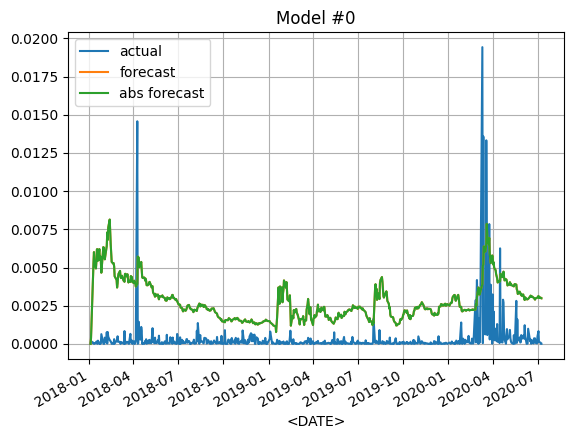

In [302]:
for i, (_fvm, _test) in enumerate(zip(fvms, test)):
    (_test ** 2).plot(label='actual')
    (_fvm.hist_output).plot(label='forecast')
    (_fvm.hist_output.abs()).plot(label='abs forecast')
    
    plt.title(f'Model #{i}')
    plt.grid()
    plt.legend()
    plt.show()

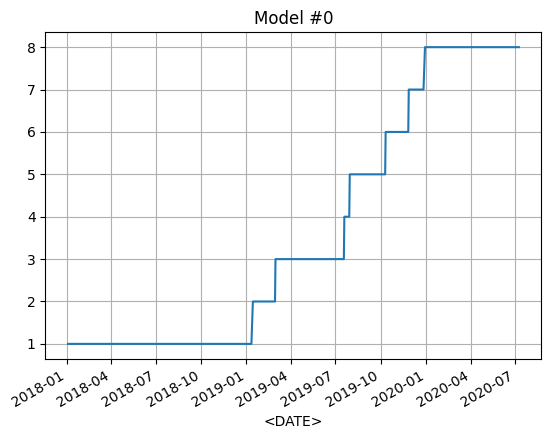

In [285]:
for i, (_fvm, _test) in enumerate(zip(fvms, test)):
    pd.Series(_fvm._n_clusters_hist, index=_fvm.train_data.index).plot(grid=True)
    
    plt.title(f'Model #{i}')

In [244]:
pd.DataFrame.from_records(_fvm._parameters_hist, index=_fvm.train_data.index).head(21)

,alpha_0,alpha,beta
<DATE>,,,
2018-01-03,[0],[[0]],[[0]]
2018-01-04,[0.0007294135018232721],[[3.8808011847956514e-10]],[[0.0]]
2018-01-05,[-0.013684675727914482],[[-2.698947909151026e-06]],[[-1.0513836894480558e-05]]
2018-01-09,[-0.008118045755977903],[[-2.332336336161142e-06]],[[-8.670567179332948e-05]]
2018-01-10,[-0.008978472105349654],[[-2.4016598794021065e-06]],[[-7.97187954680253e-05]]
2018-01-11,[-0.0017289070961569756],[[-2.3806227846451234e-06]],[[-0.00014483671758739653]]
2018-01-12,[-0.002804350396230817],[[-2.3889963132445244e-06]],[[-0.00014297506751179313]]
2018-01-15,[-0.00880427405799911],[[-2.8538894595732146e-06]],[[-0.00012613248941760425]]
2018-01-16,[-0.012360646518350232],[[-3.3971129847134793e-06]],[[-9.480010338064144e-05]]


In [77]:
# _slc = slice(None, 126)

# plt.figure(figsize=(15, 7))
# plt.plot(res_big[0]['test'].iloc[_slc] ** 2, label='$y_t^2$')
# plt.plot(tested_seas.hist_output.iloc[_slc], label='$h_t$ fuzzy seasonal')
# plt.plot(tested_wos.hist_output.iloc[_slc], label='$h_t$ fuzzy w/o seasonality')
# plt.plot(rgf.iloc[_slc], label='$h_t$ classic')

# plt.legend()
# plt.grid()

# _fmt = 'pdf'
# _now = str(pd.Timestamp.now().floor('s')).replace(':', '-').replace(' ', '_')
# _fig_name = f'res_analysis_fig_now.{_fmt}'
# plt.savefig(FIGS_DIR / _fig_name, format=_fmt)